# Projekt przewidywania temperatury

### Przedmiot projektu

Projekt obejmuje stworzenie algorytmu uczenia maszynowego w celu przewidywania pogody dla miasta Szeged na Węgrzech.<br>
Dane były pobierane w przedziale czasowym od 2006-01-01 00:00:00 do 2016-12-31 23:00:00 o każdej pełnej godzine.

In [1]:
# Imports

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 10, 8

import sklearn

import warnings
warnings.filterwarnings('ignore')

In [2]:
# load dataset
df = pd.read_csv("weatherHistory.csv")
df.head()

Formatted Date        Summary Precip Type  Temperature (C)  \
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain         9.472222   
1  2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain         9.355556   
2  2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain         9.377778   
3  2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain         8.288889   
4  2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain         8.755556   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   
3                  5.944444      0.83            14.1036   
4                  6.977778      0.83            11.0446   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  \
0                   251.0          15.8263         0.0               1015.13   
1                   259.0          15.8263         0.0               1015.63   
2                   204.0          14.9569         0.0               1015.94   
3                   269.0          15.8263         0.0               1016.41   
4                   259.0          15.8263         0.0               1016.51   

                       Daily Summary  
0  Partly cloudy throughout the day.  
1  Partly cloudy throughout the day.  
2  Partly cloudy throughout the day.  
3  Partly cloudy throughout the day.  
4  Partly cloudy throughout the day.

In [3]:
# shape of dataframe
df_shape = df.shape
print(f"Dataset weatherHistory posiada {df_shape[1]} cech oraz {df_shape[0]} obserwacji.")

Dataset weatherHistory posiada 12 cech oraz 96453 obserwacji.


In [4]:
# data frame information about features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [5]:
pd.DataFrame(df.isna().mean()).T

Formatted Date  Summary  Precip Type  Temperature (C)  \
0             0.0      0.0      0.00536              0.0   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                       0.0       0.0                0.0   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  \
0                     0.0              0.0         0.0                   0.0   

   Daily Summary  
0            0.0

In [6]:
# description for numerical features
df.describe()

Temperature (C)  Apparent Temperature (C)      Humidity  \
count     96453.000000              96453.000000  96453.000000   
mean         11.932678                 10.855029      0.734899   
std           9.551546                 10.696847      0.195473   
min         -21.822222                -27.716667      0.000000   
25%           4.688889                  2.311111      0.600000   
50%          12.000000                 12.000000      0.780000   
75%          18.838889                 18.838889      0.890000   
max          39.905556                 39.344444      1.000000   

       Wind Speed (km/h)  Wind Bearing (degrees)  Visibility (km)  Loud Cover  \
count       96453.000000            96453.000000     96453.000000     96453.0   
mean           10.810640              187.509232        10.347325         0.0   
std             6.913571              107.383428         4.192123         0.0   
min             0.000000                0.000000         0.000000         0.0   
25%             5.828200              116.000000         8.339800         0.0   
50%             9.965900              180.000000        10.046400         0.0   
75%            14.135800              290.000000        14.812000         0.0   
max            63.852600              359.000000        16.100000         0.0   

       Pressure (millibars)  
count          96453.000000  
mean            1003.235956  
std              116.969906  
min                0.000000  
25%             1011.900000  
50%             1016.450000  
75%             1021.090000  
max             1046.380000

#### Wnioski

Data frame posiada wartości NaN dla cechy 'Precip Type', co stanowi 5.3%% (promila) wszystkich danych. <br> <br>

Kolumny kategoryczne: Formatted Date, Summary, Precip Type, Daily Summary <br>
Kolumny numeryczne: Temperature (C), Apparent Temperature (C), Humidity, Wind Speed (km/h), Wind Bearing (degrees), Visibility (km), Loud Cover, Pressure (millibars)

Kolumna Loud Cover posiada tylko wartości 0, dlatego nie jest istotna dla data frame.

## Feature engineering

### Zamiana pustych wartości dla columny 'Precip Type'


In [7]:
# value counts for Precip Type
df["Precip Type"].value_counts(dropna=False)

rain    85224
snow    10712
NaN       517
Name: Precip Type, dtype: int64

In [8]:
# create dataframe with  empyt's values Precip type and display 10 samples
df_precip_null = df.loc[df["Precip Type"].isnull()]
df_precip_null.sample(10)

Formatted Date        Summary Precip Type  \
95131  2016-10-14 23:00:00.000 +0200  Mostly Cloudy         NaN   
95503  2016-10-29 11:00:00.000 +0200       Overcast         NaN   
95446  2016-10-27 02:00:00.000 +0200          Clear         NaN   
95093  2016-10-13 09:00:00.000 +0200          Clear         NaN   
95575  2016-10-31 10:00:00.000 +0100          Clear         NaN   
58953  2012-05-28 10:00:00.000 +0200  Partly Cloudy         NaN   
95232  2016-10-19 04:00:00.000 +0200       Overcast         NaN   
52830  2012-04-18 06:00:00.000 +0200  Mostly Cloudy         NaN   
95391  2016-10-24 19:00:00.000 +0200  Partly Cloudy         NaN   
95540  2016-10-30 00:00:00.000 +0200          Clear         NaN   

       Temperature (C)  Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
95131         9.400000                  7.466667      0.77            12.9605   
95503        11.511111                 11.511111      0.73            18.4184   
95446         5.072222                  1.905556      0.84            14.6832   
95093         8.288889                  5.994444      0.86            13.7333   
95575         7.688889                  6.177778      0.75             8.5813   
58953        19.883333                 19.883333      0.46             8.9033   
95232         6.961111                  6.194444      0.73             5.3613   
52830         6.255556                  4.083333      0.88            10.4328   
95391        14.127778                 14.127778      0.82            14.7637   
95540         6.333333                  3.277778      0.75            15.9390   

       Wind Bearing (degrees)  Visibility (km)  Loud Cover  \
95131                    88.0          15.1823         0.0   
95503                   299.0           0.0000         0.0   
95446                    14.0           0.0000         0.0   
95093                   281.0          15.7297         0.0   
95575                   264.0           0.0000         0.0   
58953                     7.0          11.1090         0.0   
95232                   128.0          15.6492         0.0   
52830                     0.0           9.9820         0.0   
95391                   160.0           9.9981         0.0   
95540                   319.0           0.0000         0.0   

       Pressure (millibars)                                      Daily Summary  
95131               1020.09                               Foggy until morning.  
95503               1027.91                       Mostly cloudy until evening.  
95446               1027.25  Partly cloudy starting in the morning continui...  
95093               1018.75                     Foggy starting in the evening.  
95575               1024.20           Mostly cloudy starting in the afternoon.  
58953               1013.04                  Partly cloudy throughout the day.  
95232               1022.88                       Overcast throughout the day.  
52830               1003.32                  Mostly cloudy throughout the day.  
95391               1022.88                               Foggy until morning.  
95540               1027.62                          Clear throughout the day.

In [9]:
# check teperatures min and max for NaNs
temp_max = round(df_precip_null["Temperature (C)"].max(),2)
temp_min = round(df_precip_null["Temperature (C)"].min(),2)
print(f"Temperatura dla brakujących wartości max={temp_max}, min={temp_min} w kolumne Precip Type")

Temperatura dla brakujących wartości max=25.04, min=1.26 w kolumne Precip Type


#### Wnioski:

Minimalna wartość temperatury dla NaN dla cechy Precip Type to 1.26 stopni, dlatego puste wartości zamieniono na wartość 'rain'.

In [10]:
# replace NaNs with 'rain'
df['Precip Type'] = df['Precip Type'].replace(np.NaN, 'rain')
df["Precip Type"].value_counts(dropna=False)

rain    85741
snow    10712
Name: Precip Type, dtype: int64

### Stworzenie kolumn dla miesiąca i godziny

In [11]:
# add column with month
df["Month"] = df["Formatted Date"].apply(lambda x: int(x[5:7]))

In [12]:
# add column with hout
df["Hour"] = df["Formatted Date"].apply(lambda x: int(x[11:13]))

### Grupowanie kolumn miesiąca i godziny na pory roku i dnia

In [13]:
# add column with grupped month

# 1 - Winter
# 2 - Spring
# 3 - Summer
# 4 - Autumn

season = {1: 1, 2: 1, 3: 2, 4: 2, 5: 2, 6: 3, 7: 3, 8: 3, 9: 4, 10: 4, 11: 4, 12: 1}
df["year_season"] = df["Month"].map(season)

In [14]:
# add column with grupped hour

# 1 - Morning
# 2 - Afternoon
# 3 - Evening
# 4 - Night

parts_of_the_day = {5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 2, 12: 2, 13: 2, 14: 2, 15: 2, 16: 2, 17: 3, 18: 3, 19: 3, 20: 3, 21: 3, 22: 3, 23: 4, 0: 4, 1: 4, 2: 4, 3: 4, 4: 4}

df["day_part"] = df["Hour"].map(parts_of_the_day)

### Usuwanie kolumn

In [15]:
# print column where is only one unique value

for col in df.columns:
    a = df[col].unique()
    if len(a) == 1:
        print(col, a)

Loud Cover [0.]


In [16]:
# drop column 'Loud Cover' - because it has only 1 unique value
df = df.drop('Loud Cover', axis=1)

In [17]:
# drop column 'Formatted Date' - because features for month and hour have been created from this feature
df = df.drop('Formatted Date', axis=1)

### Columny kategoryczne

In [18]:
# create features for snow and rain from Precip Type feature, and removed it
df = pd.get_dummies(df, columns = ['Precip Type'])
df.rename(columns={'Precip Type_rain': 'Rain', 'Precip Type_snow': 'Snow'}, inplace=True)

In [19]:
# create features for each kind of "Summary", and separate the summary where value is concated with separator ' and '. 
# Assign '1' valuer for observation when is has this kind of value

def create_summary_columns(column_name, data_frame):
    """Create column if it is not exist in currwent dataframe and assign '0'.
    :param column_name: name of column wich will be created
    :param data_frame: data frame
    """
    if column_name not in data_frame.columns:
        data_frame[column_name] = 0
        
separator = " and " # separator for concated values
list_of_values = df["Summary"].unique() # list of unique values in feature 'Summary'

# Summary column
# create new columns from Summary unique values
for unique_value in list_of_values:
    if separator in unique_value:
        value_list = unique_value.split(separator)
        for col_name in value_list:
            create_summary_columns(col_name, df)
            df.loc[df["Summary"] == unique_value, col_name] = 1
    else:
        create_summary_columns(unique_value, df)
        df.loc[df["Summary"] == unique_value, unique_value] = 1
        
# drop feature 'Summary'
df = df.drop('Summary', axis=1)

### Columny numeryczne

In [20]:
# Add column with temperature difference between measured and apparent temperature 

# this column will be not used to create a predict model
df["temperature difference"] = df["Apparent Temperature (C)"] - df["Temperature (C)"]
df = df.drop("Apparent Temperature (C)", axis=1)

In [21]:
# display data frame
df.head()

Temperature (C)  Humidity  Wind Speed (km/h)  Wind Bearing (degrees)  \
0         9.472222      0.89            14.1197                   251.0   
1         9.355556      0.86            14.2646                   259.0   
2         9.377778      0.89             3.9284                   204.0   
3         8.288889      0.83            14.1036                   269.0   
4         8.755556      0.83            11.0446                   259.0   

   Visibility (km)  Pressure (millibars)                      Daily Summary  \
0          15.8263               1015.13  Partly cloudy throughout the day.   
1          15.8263               1015.63  Partly cloudy throughout the day.   
2          14.9569               1015.94  Partly cloudy throughout the day.   
3          15.8263               1016.41  Partly cloudy throughout the day.   
4          15.8263               1016.51  Partly cloudy throughout the day.   

   Month  Hour  year_season  ...  Foggy  Breezy  Clear  Humid  Windy  Dry  \
0      4     0            2  ...      0       0      0      0      0    0   
1      4     1            2  ...      0       0      0      0      0    0   
2      4     2            2  ...      0       0      0      0      0    0   
3      4     3            2  ...      0       0      0      0      0    0   
4      4     4            2  ...      0       0      0      0      0    0   

   Dangerously Windy  Light Rain  Drizzle  temperature difference  
0                  0           0        0               -2.083333  
1                  0           0        0               -2.127778  
2                  0           0        0                0.000000  
3                  0           0        0               -2.344444  
4                  0           0        0               -1.777778  

[5 rows x 26 columns]

In [22]:
# # Daily Summary column
df_daily_summary = pd.DataFrame()
df_daily_summary["Count"] = df.groupby(['Daily Summary'])["Daily Summary"].count()
df_daily_summary
df_daily_summary.describe()

Count
count    214.000000
mean     450.714953
std     1713.287546
min       23.000000
25%       24.000000
50%       24.000000
75%      168.000000
max    20085.000000

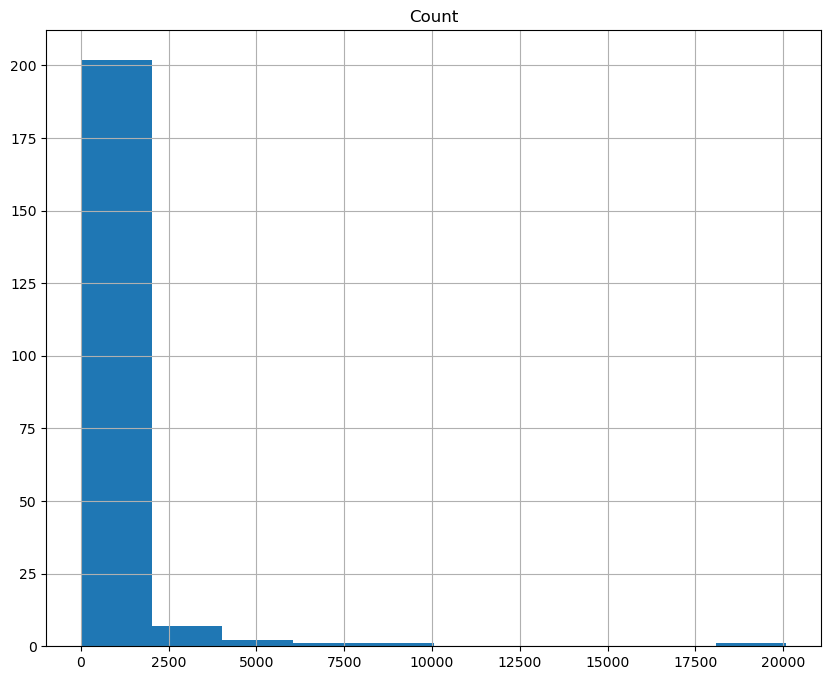

In [23]:
df_daily_summary.hist()
plt.show()

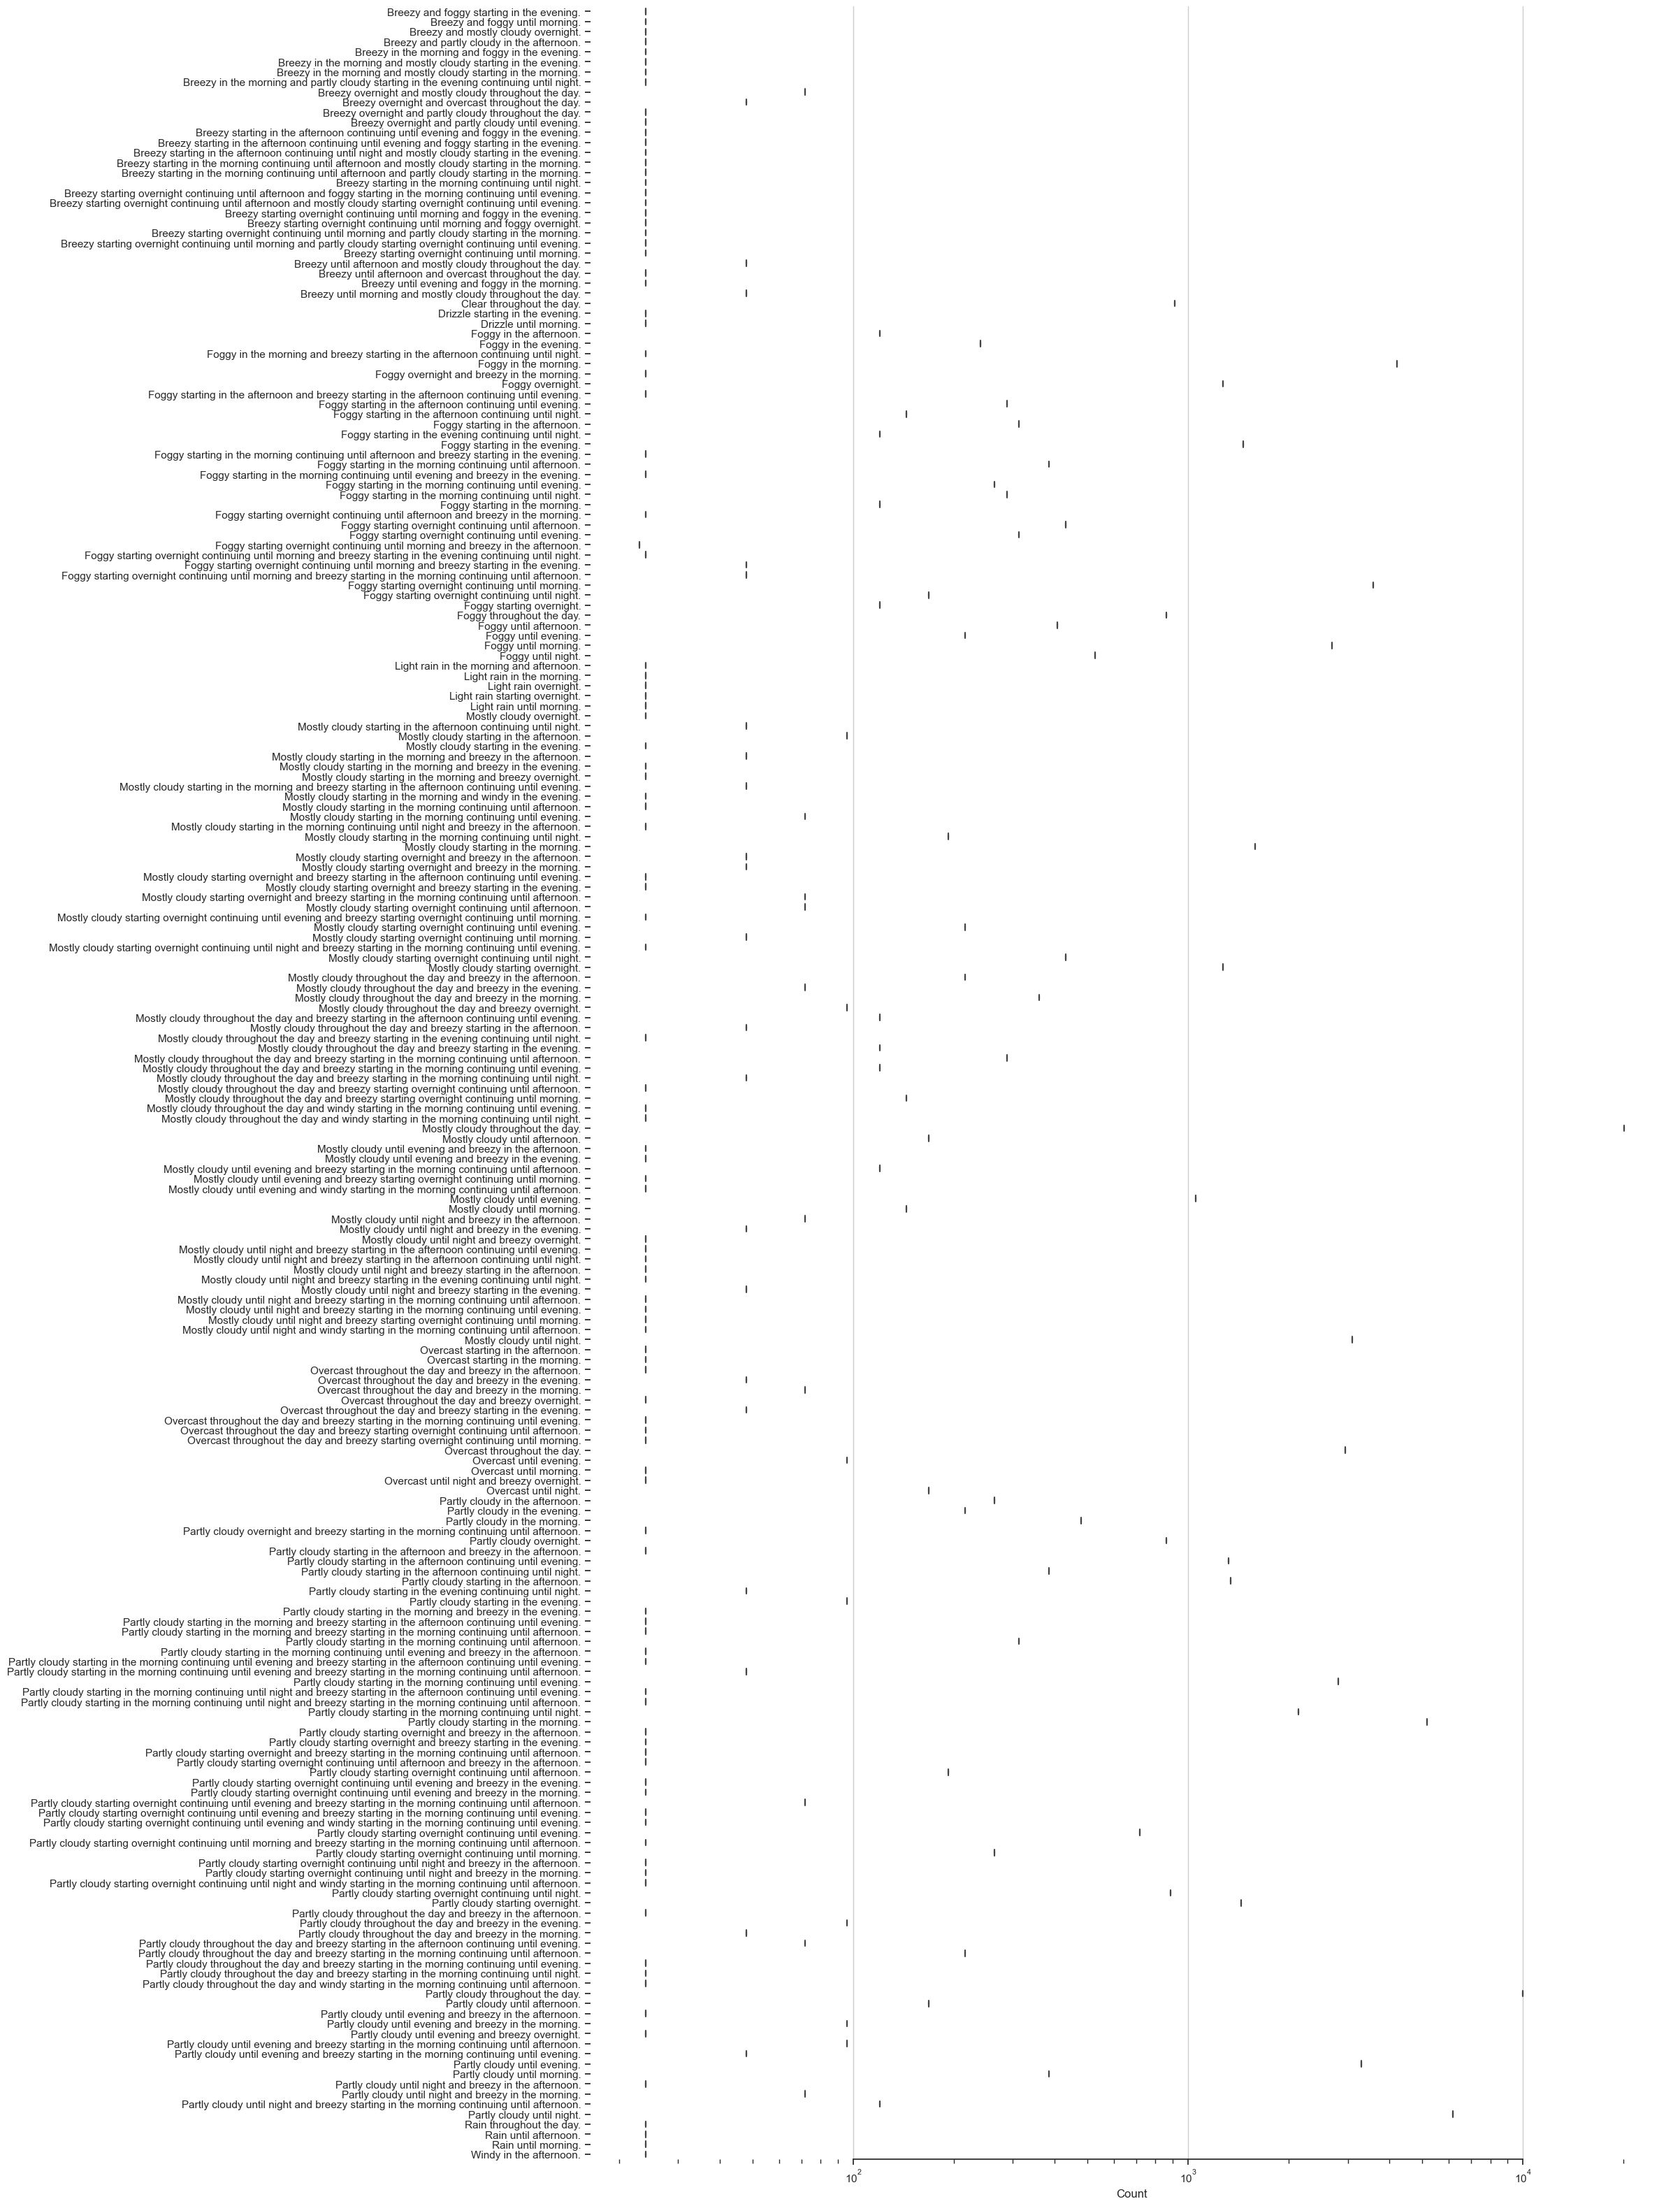

In [24]:
sns.set_theme(style="ticks")
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(20, 40))
ax.set_xscale("log")
# Plot the orbital period with horizontal boxes
sns.boxplot (x="Count", y=df_daily_summary.index, data=df_daily_summary,
            whis=[0, 100], width=.6, palette="vlag")
# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

In [25]:
df = df.drop("Daily Summary", axis=1)

#### Wnioski:
Kolumny kategoryczne zostały usunięte lub na ich podstawie stworzono nowe kolumny ktore mogą być wykorzystrane do storzenia modelu.

Cecha 'Daily Summary' nie została na chwile obecą usunięta, bo zostanie zwizualizowana poniźej.

## Analiza wykresów cech

In [26]:
originalFeatures = df.columns
print('originalFeatures count', len(originalFeatures))
print('originalFeatures', originalFeatures)

originalFeatures count 25
originalFeatures Index(['Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)',
       'Month', 'Hour', 'year_season', 'day_part', 'Rain', 'Snow',
       'Partly Cloudy', 'Mostly Cloudy', 'Overcast', 'Foggy', 'Breezy',
       'Clear', 'Humid', 'Windy', 'Dry', 'Dangerously Windy', 'Light Rain',
       'Drizzle', 'temperature difference'],
      dtype='object')


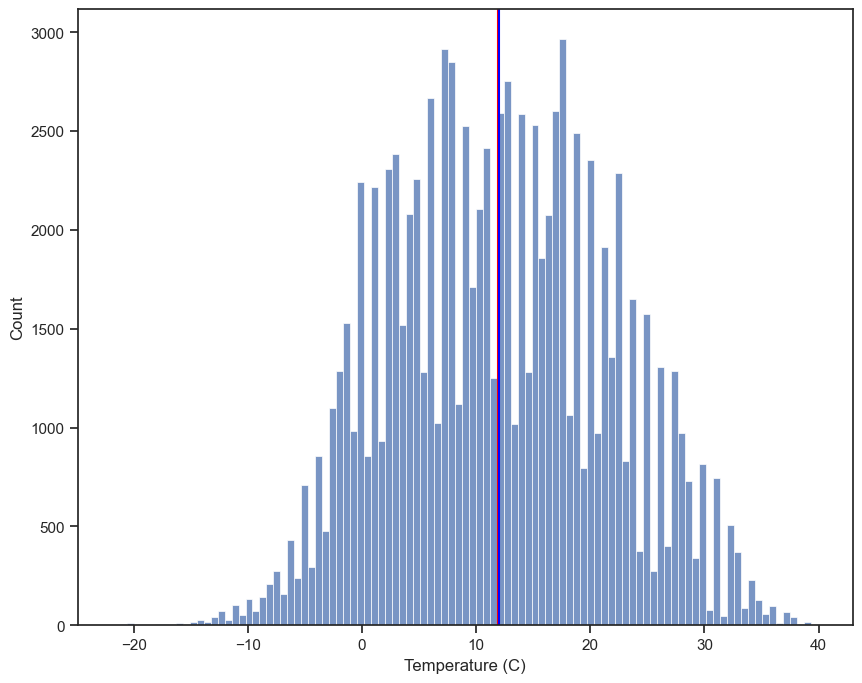

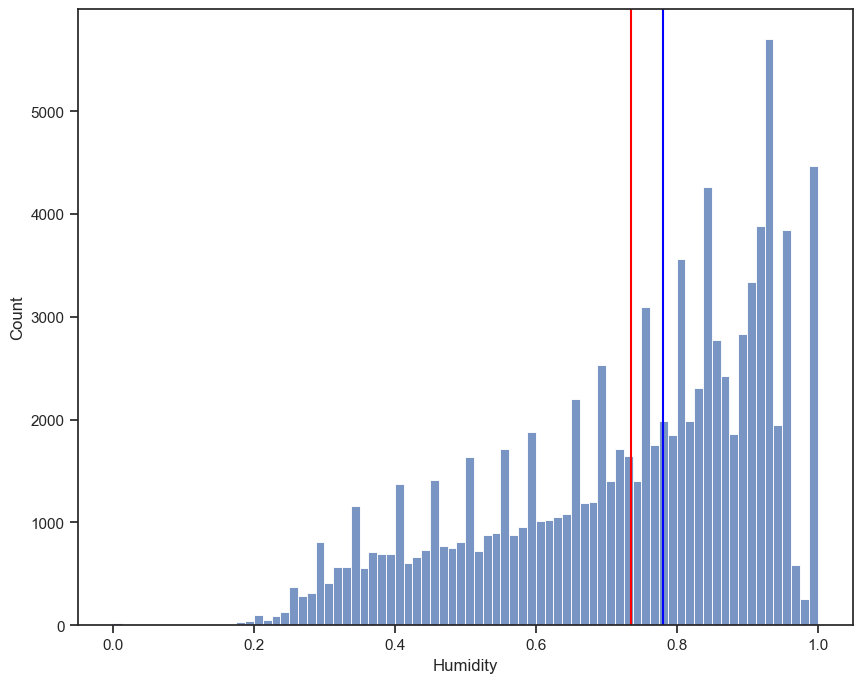

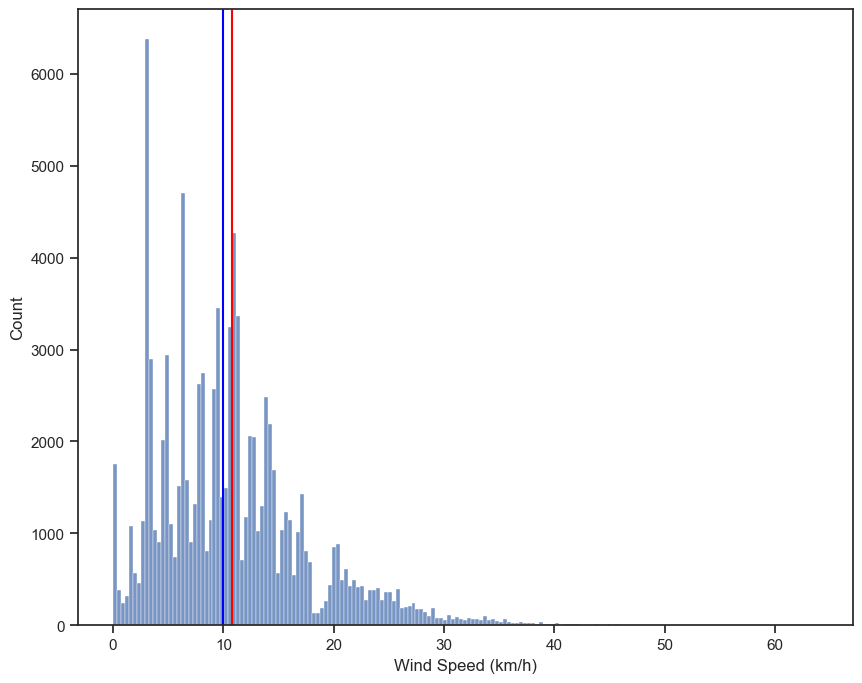

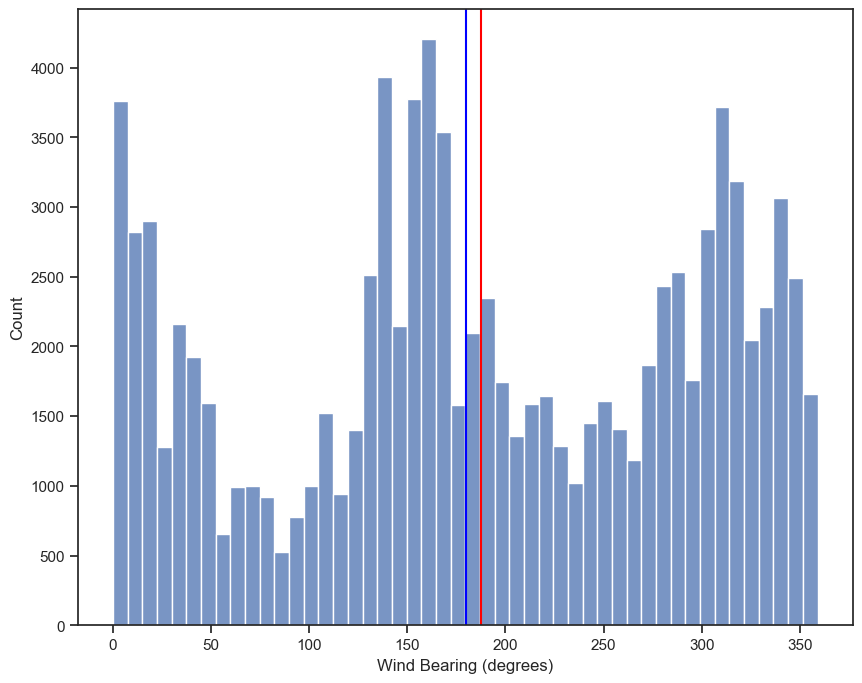

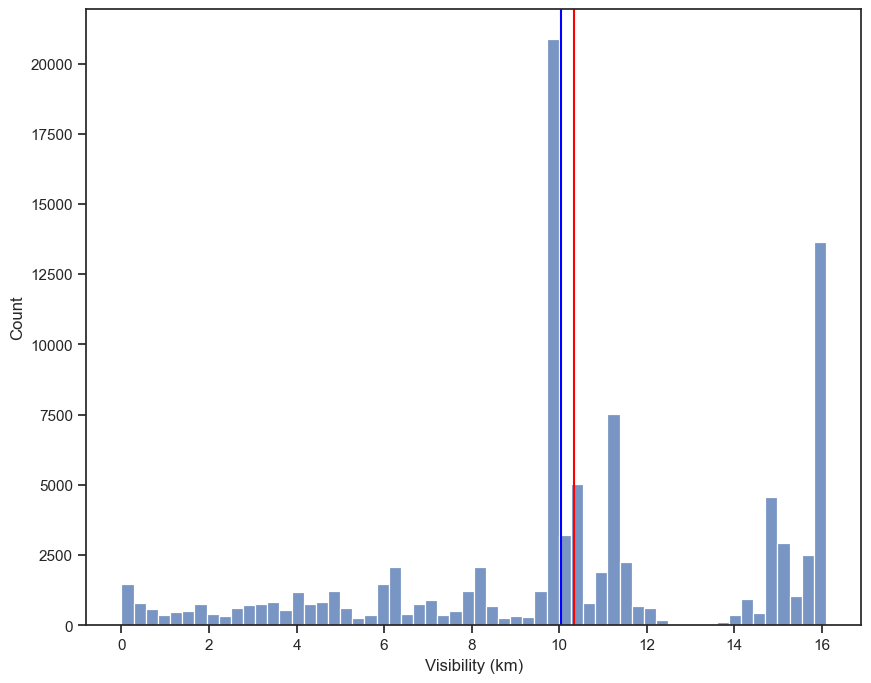

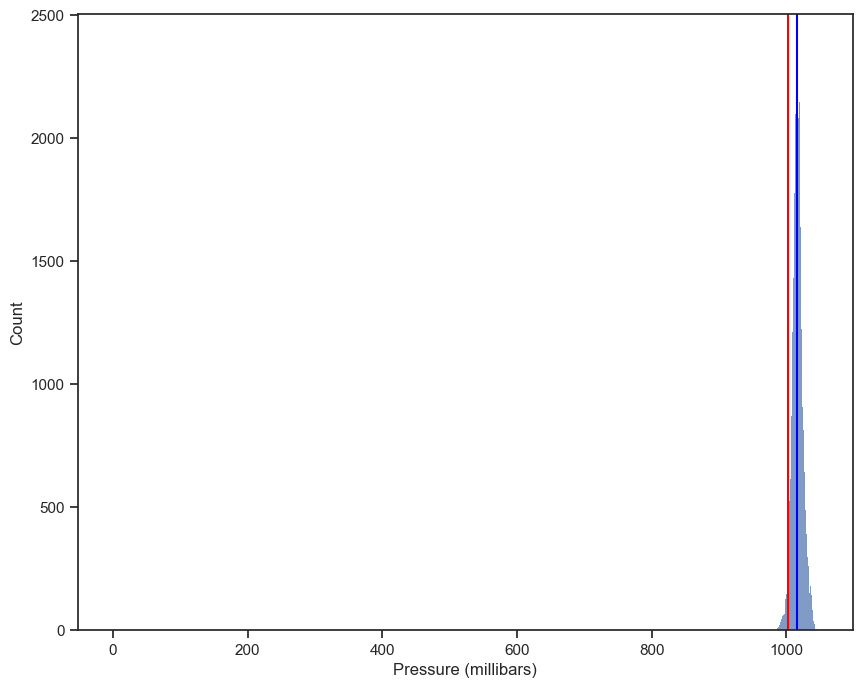

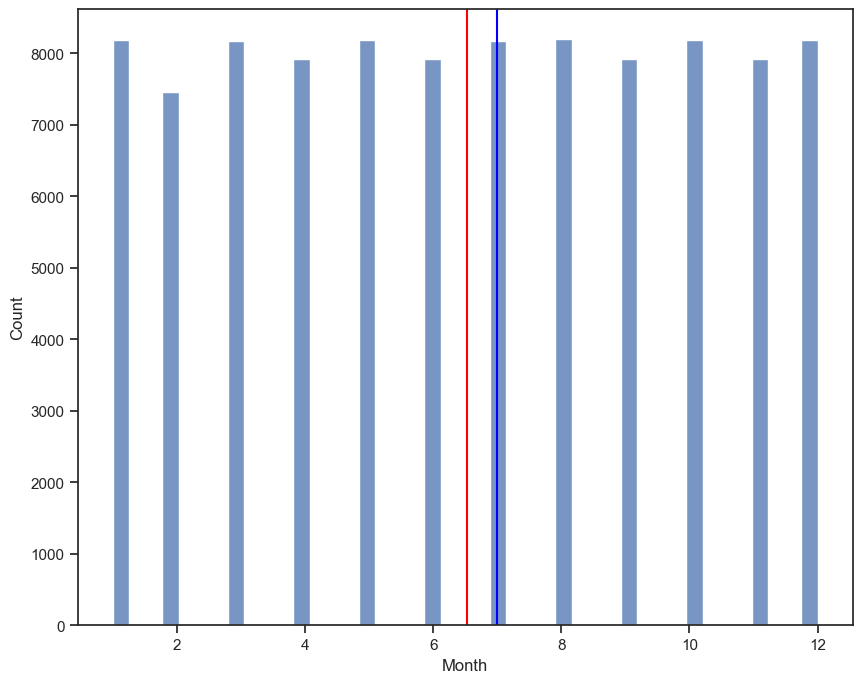

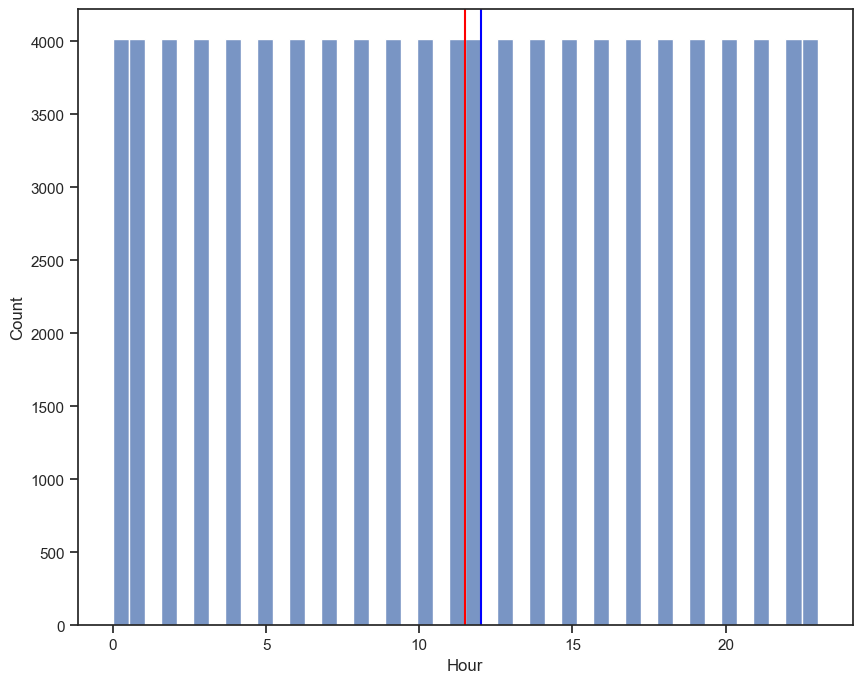

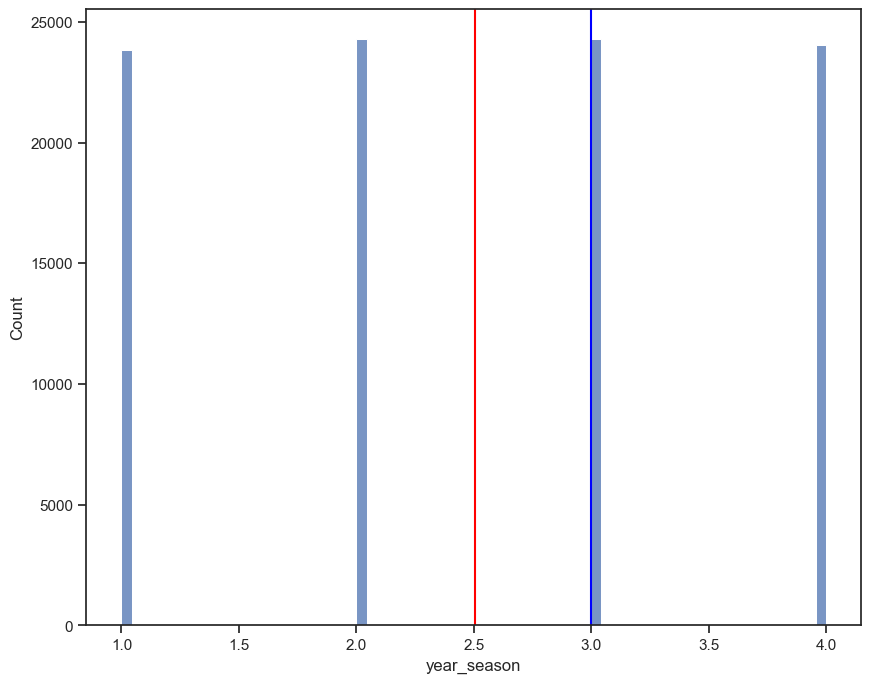

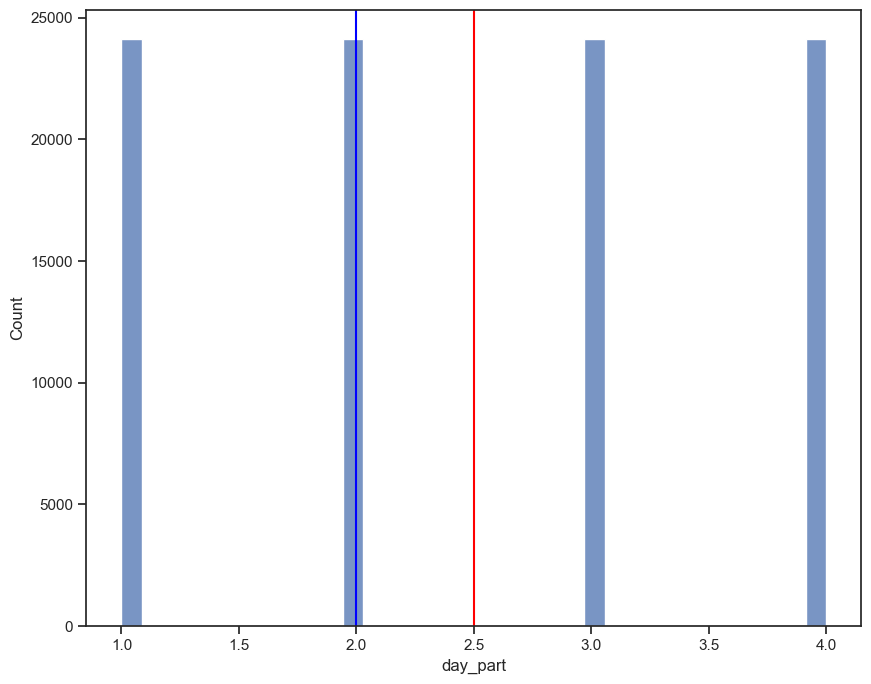

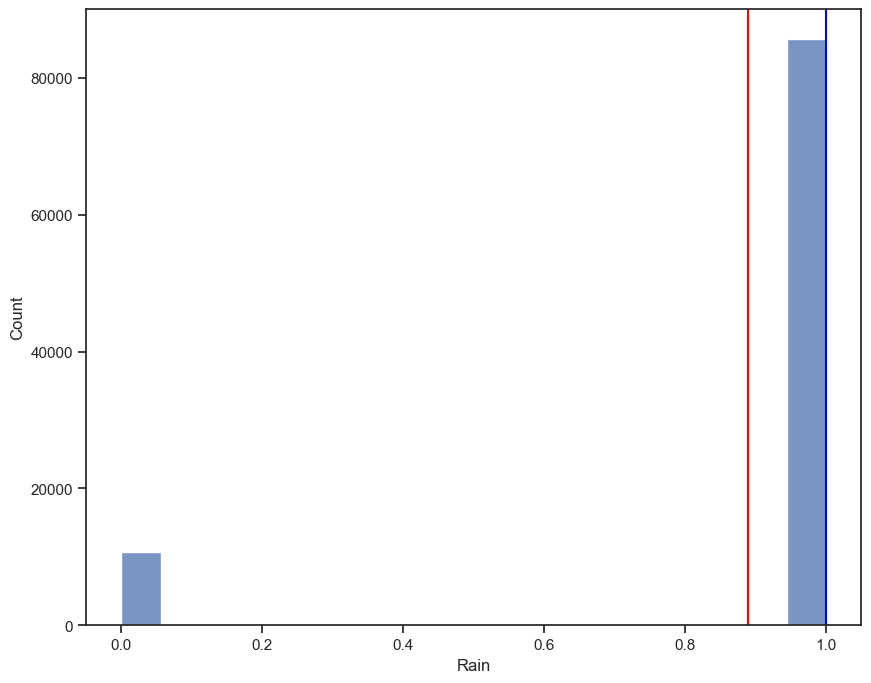

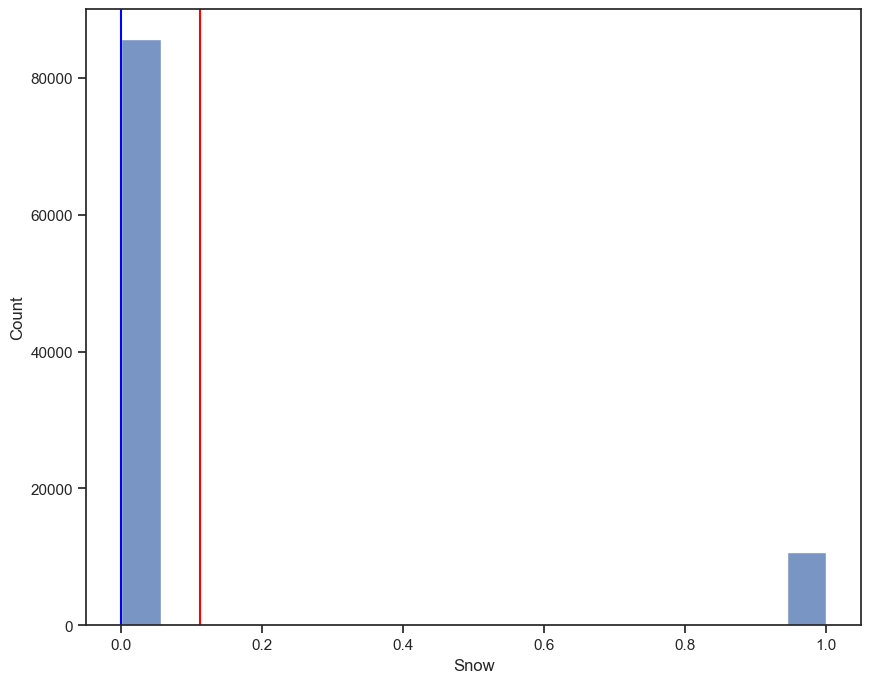

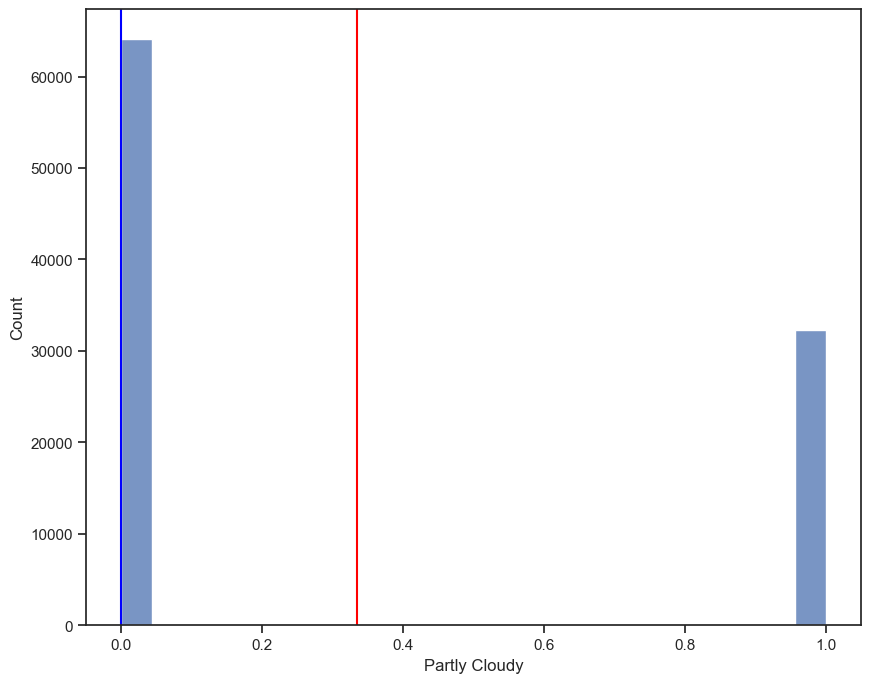

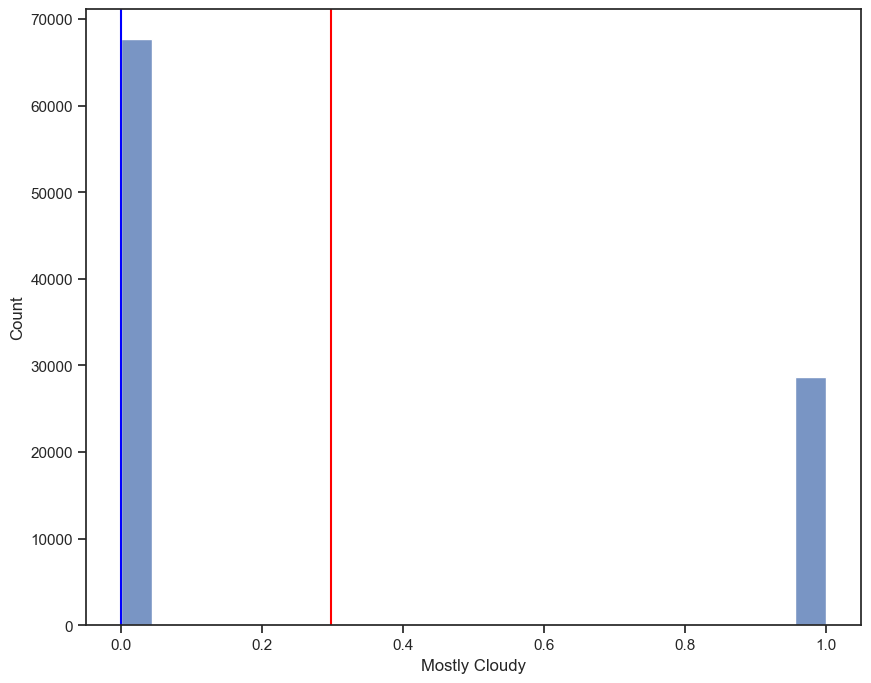

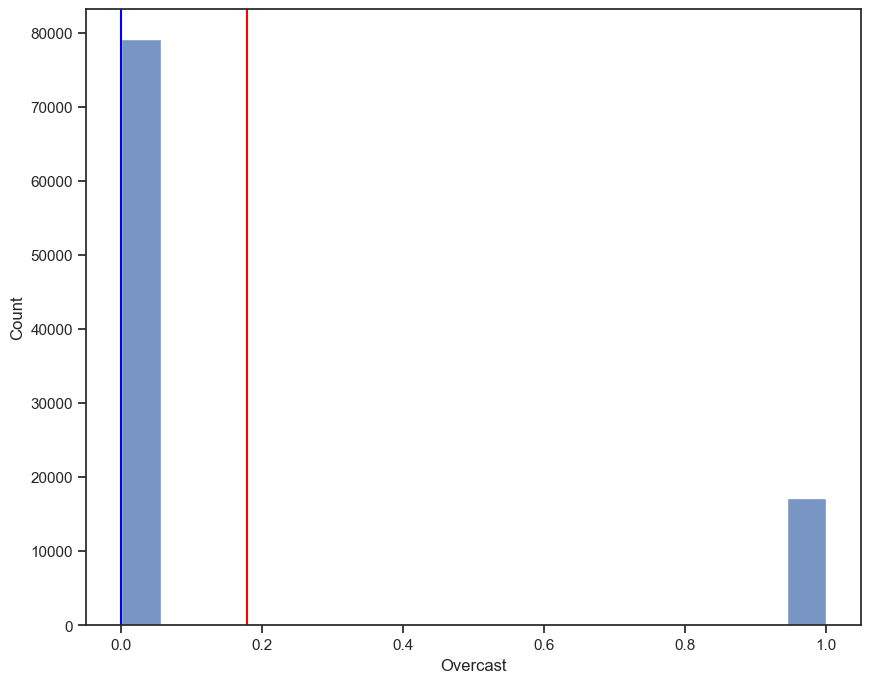

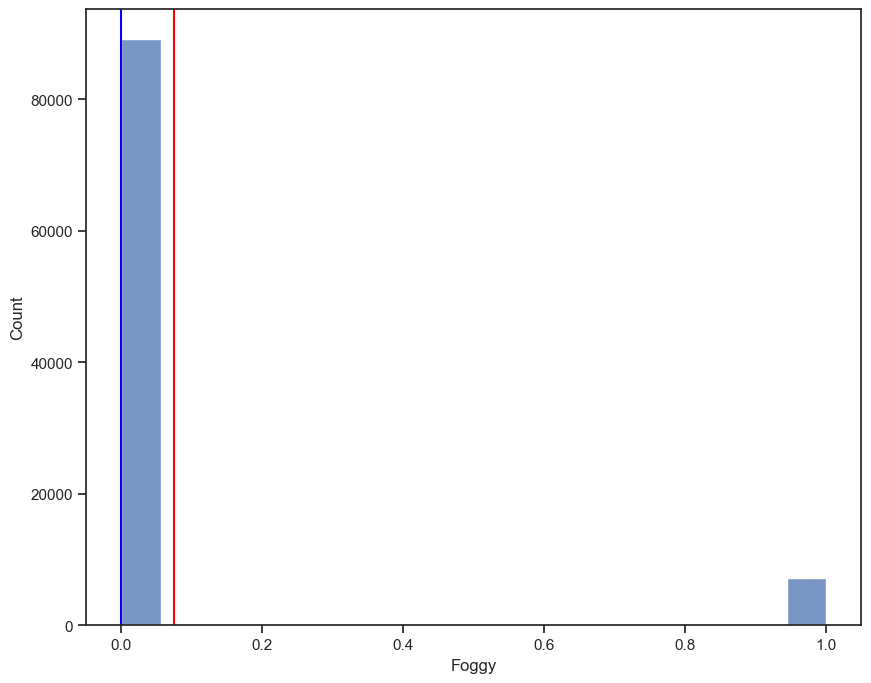

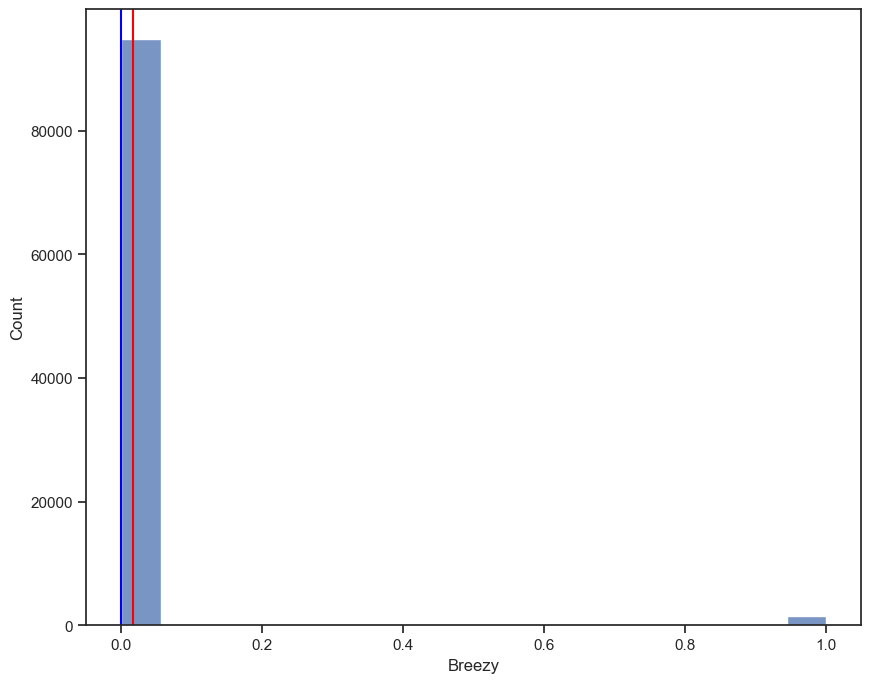

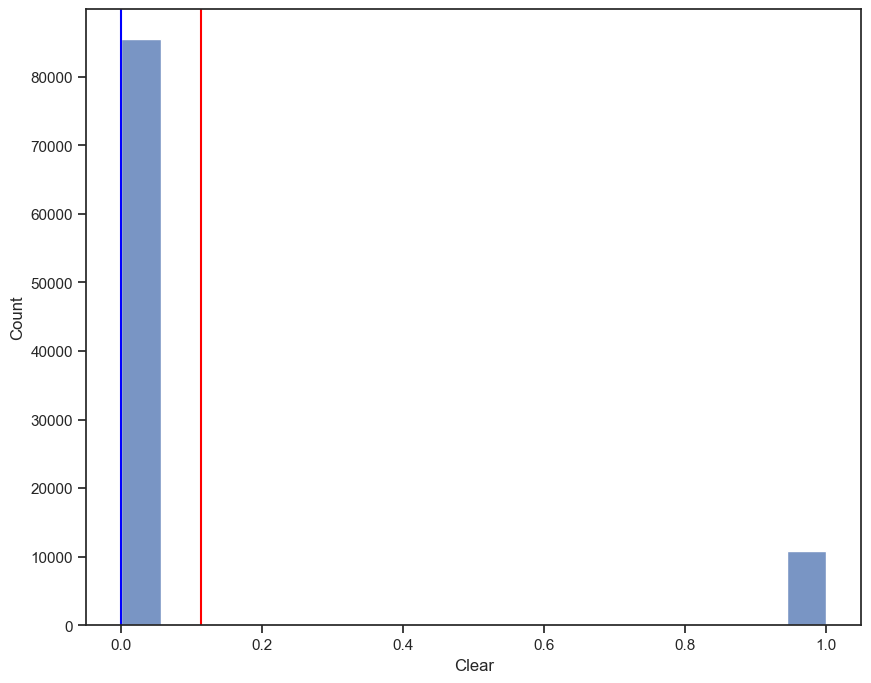

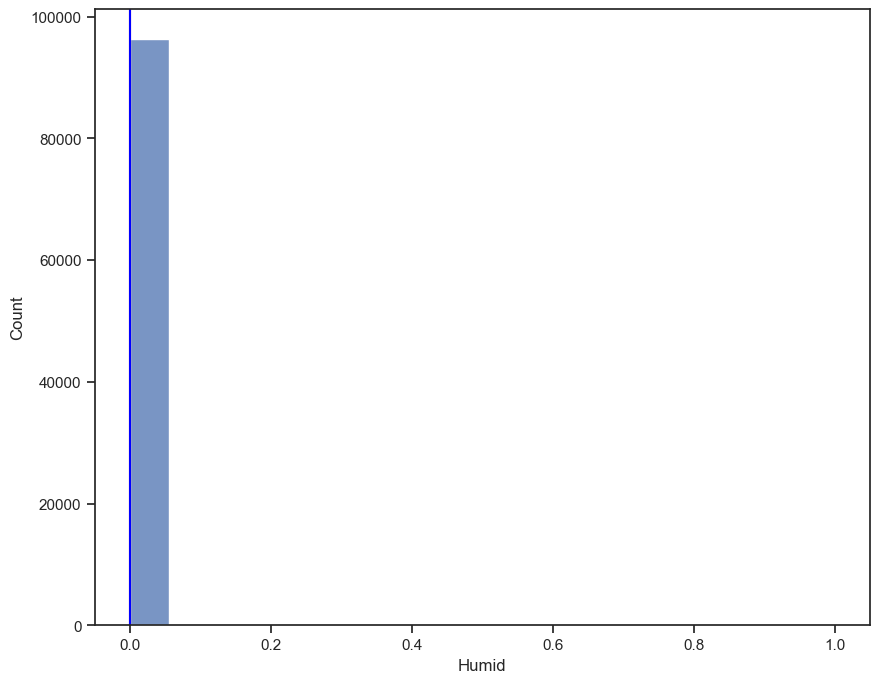

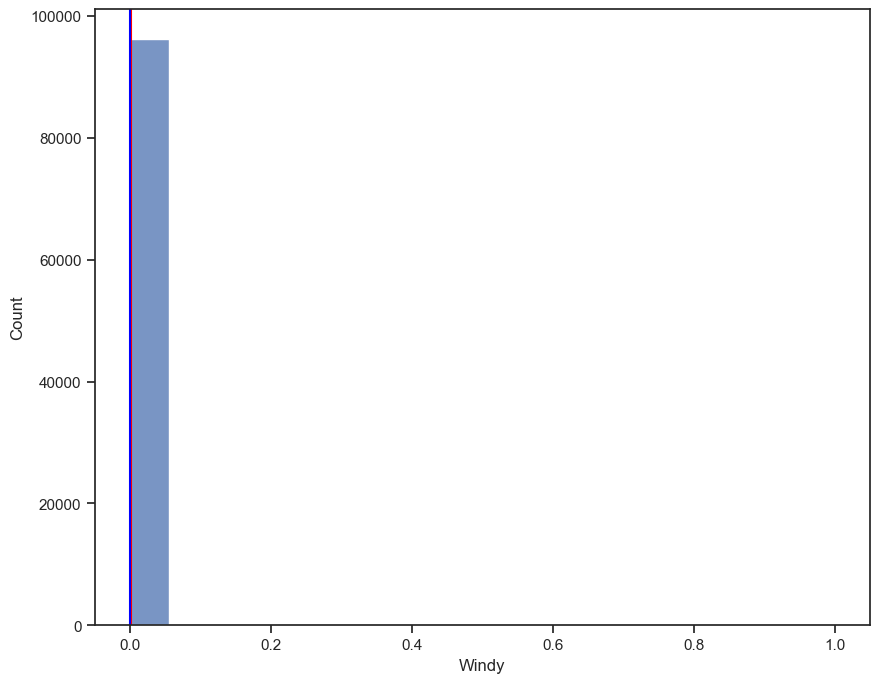

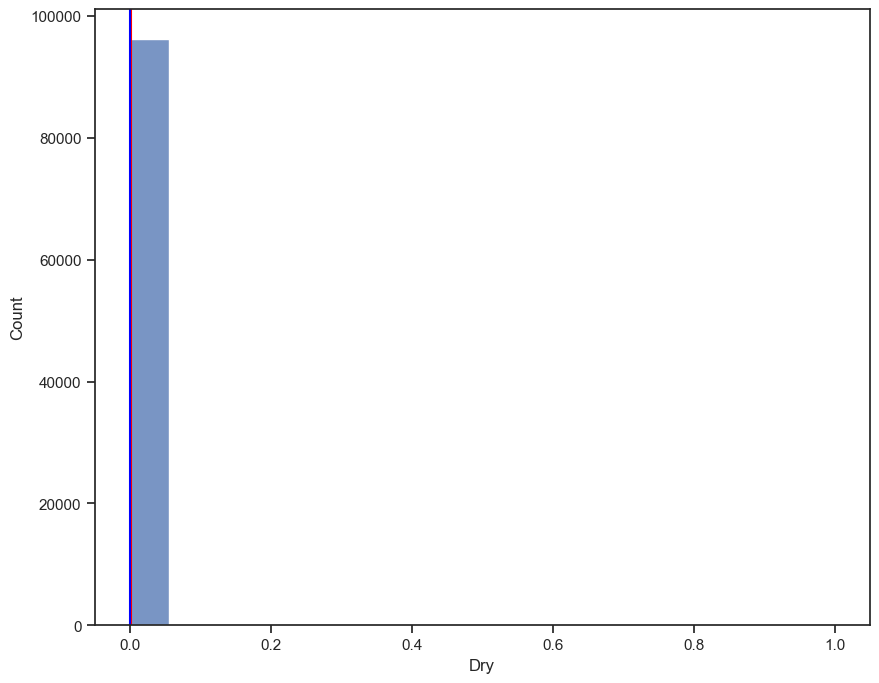

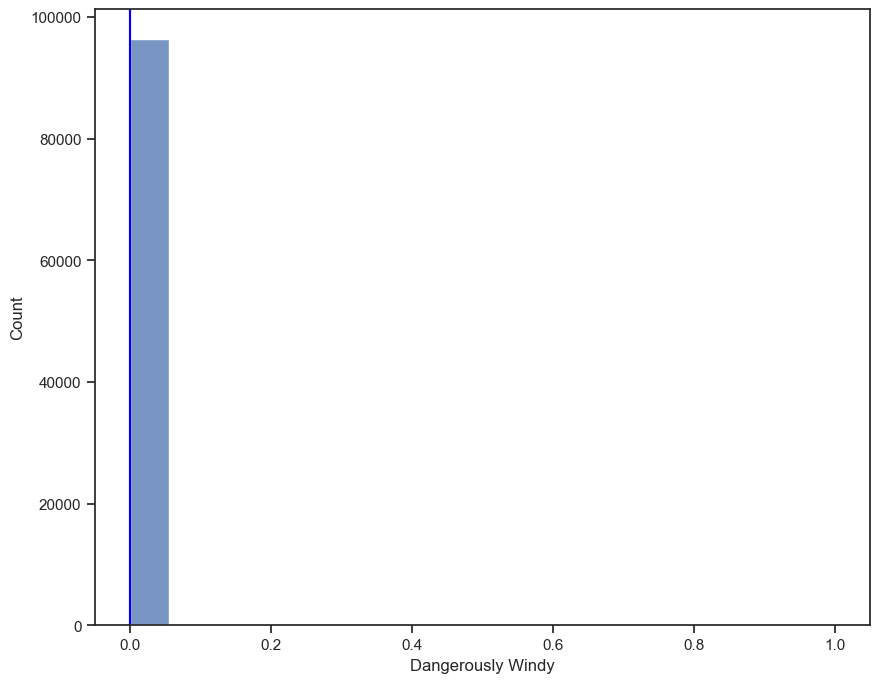

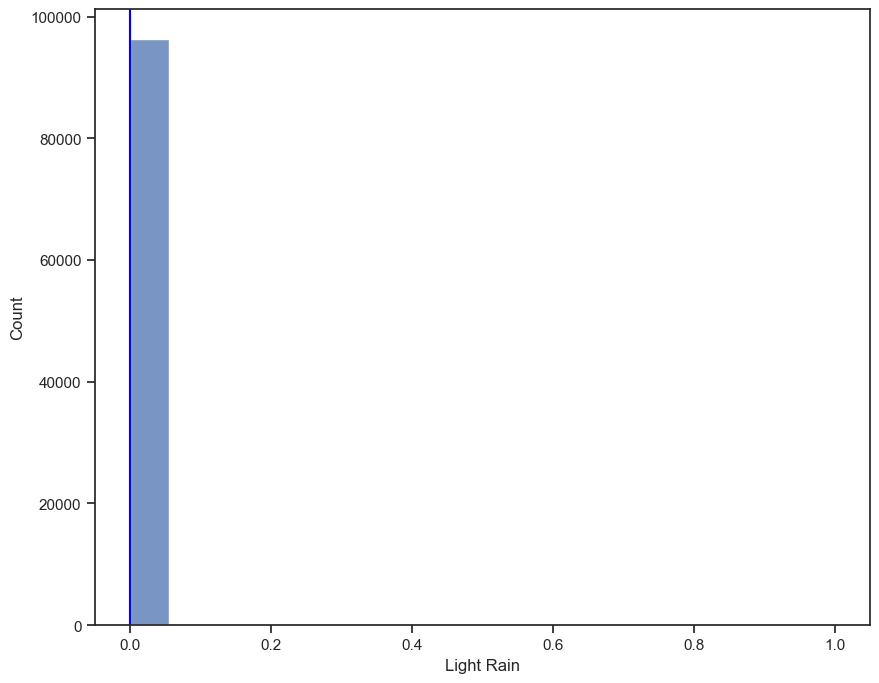

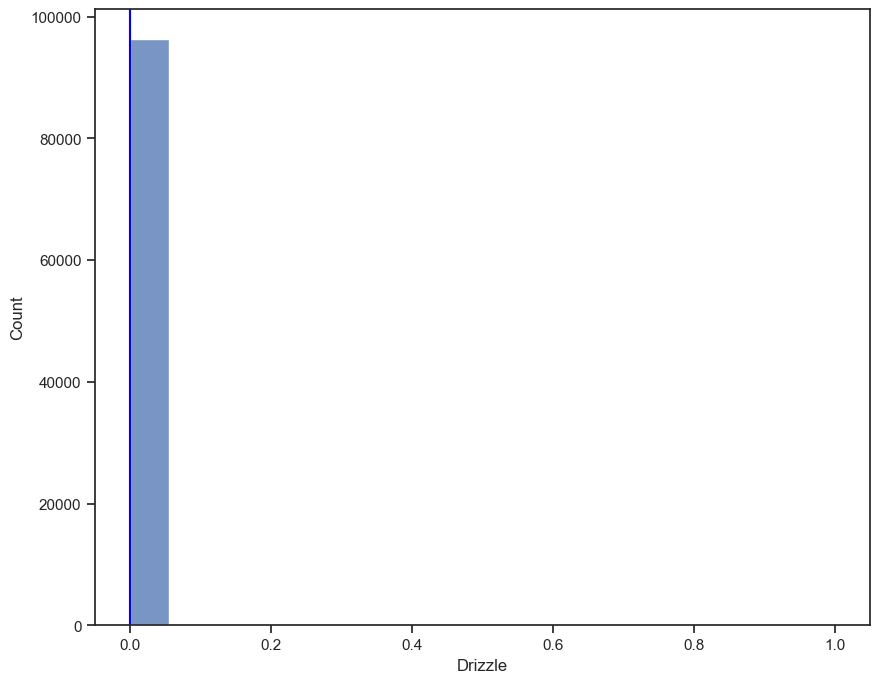

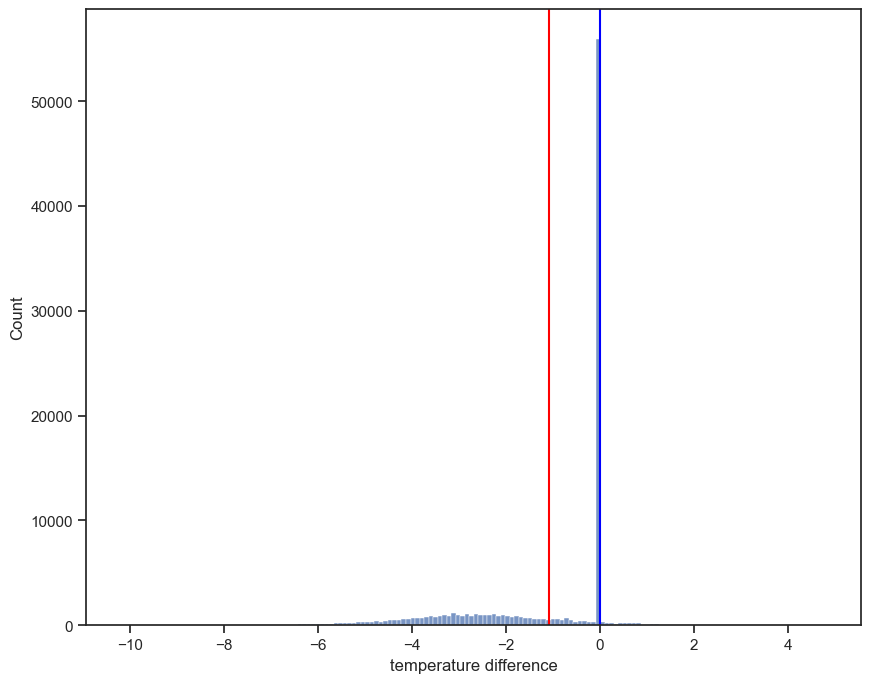

In [27]:
for feature in df:
    sns.histplot(df, x=feature)
    plt.axvline(x=df[feature].mean(), color='red')
    plt.axvline(x=df[feature].median(), color='blue')
    plt.show()

## Wykrycie i zamiana wartości odstających

In [28]:
column_num = ['Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)', 'temperature difference']

for col in column_num:
    high_3sigm = df[col].mean() + 3*df[col].std()
    low_3sigm = df[col].mean() - 3*df[col].std()
    print(f"Column name: {col}\n3-sigm max {high_3sigm}\t3-sigm min {low_3sigm}")
    print(f"Max for {col}: {df[col].max()}\tMin for {col}: {df[col].min()}")
    print("Outliers to replace:", len(df.loc[df[col] < low_3sigm]) + len(df.loc[df[col] > high_3sigm]))
    df.loc[df[col] < low_3sigm, col] = low_3sigm
    df.loc[df[col] > high_3sigm, col] = high_3sigm
    print("Outliers number:", len(df.loc[df[col] < low_3sigm]) + len(df.loc[df[col] > high_3sigm]))
    print("")

Column name: Humidity
3-sigm max 1.3213171835376154	3-sigm min 0.14848074913425569
Max for Humidity: 1.0	Min for Humidity: 0.0
Outliers to replace: 28
Outliers number: 0

Column name: Wind Speed (km/h)
3-sigm max 31.551353178570416	3-sigm min -9.930072896982493
Max for Wind Speed (km/h): 63.8526	Min for Wind Speed (km/h): 0.0
Outliers to replace: 1208
Outliers number: 0

Column name: Wind Bearing (degrees)
3-sigm max 509.65951761803706	3-sigm min -134.64105266619524
Max for Wind Bearing (degrees): 359.0	Min for Wind Bearing (degrees): 0.0
Outliers to replace: 0
Outliers number: 0

Column name: Visibility (km)
3-sigm max 22.923694503508923	3-sigm min -2.229044645028626
Max for Visibility (km): 16.1	Min for Visibility (km): 0.0
Outliers to replace: 0
Outliers number: 0

Column name: Pressure (millibars)
3-sigm max 1354.1456729018912	3-sigm min 652.3262388064024
Max for Pressure (millibars): 1046.38	Min for Pressure (millibars): 0.0
Outliers to replace: 1288
Outliers number: 0

Column nam

## Wybór cech do modeli 

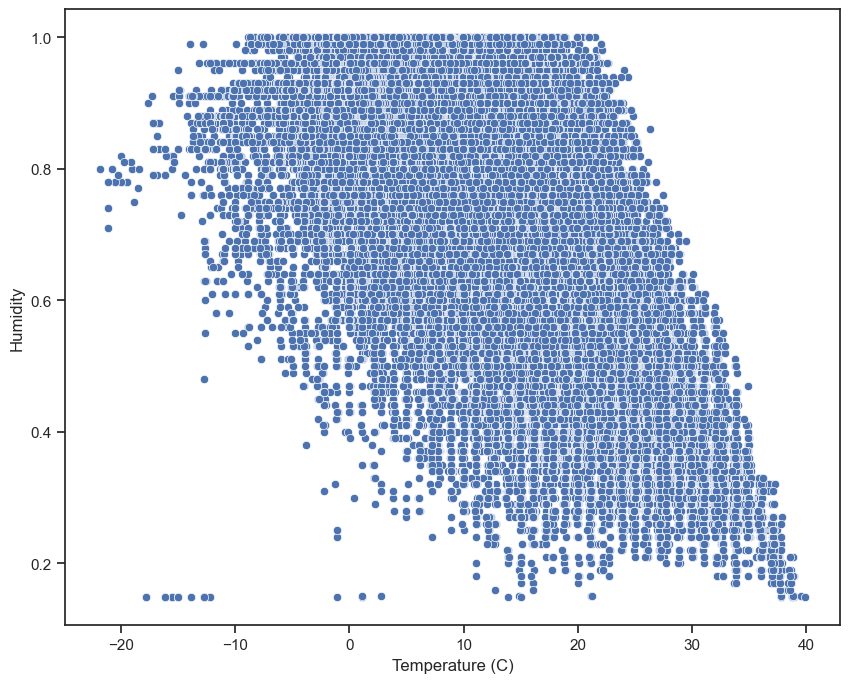

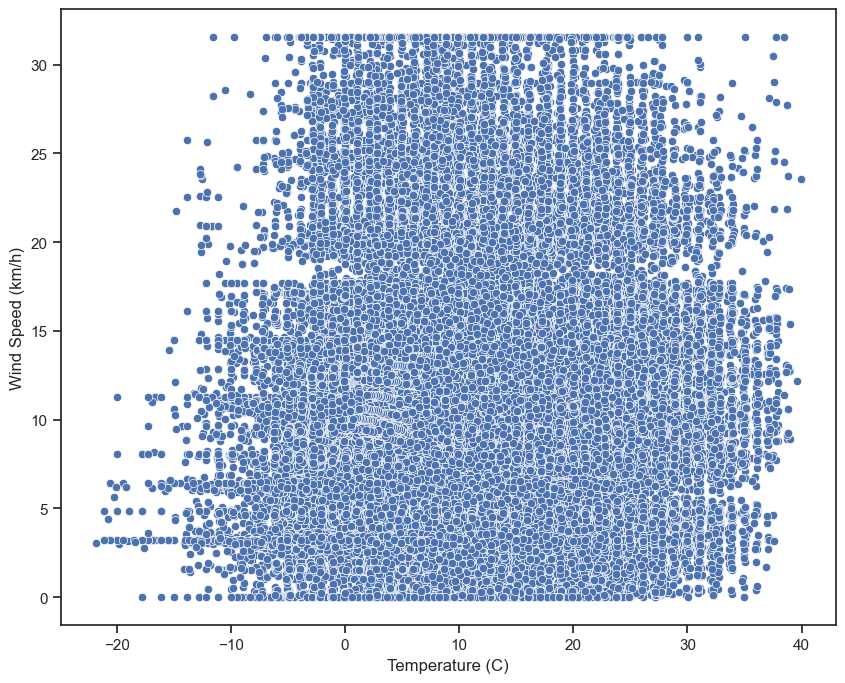

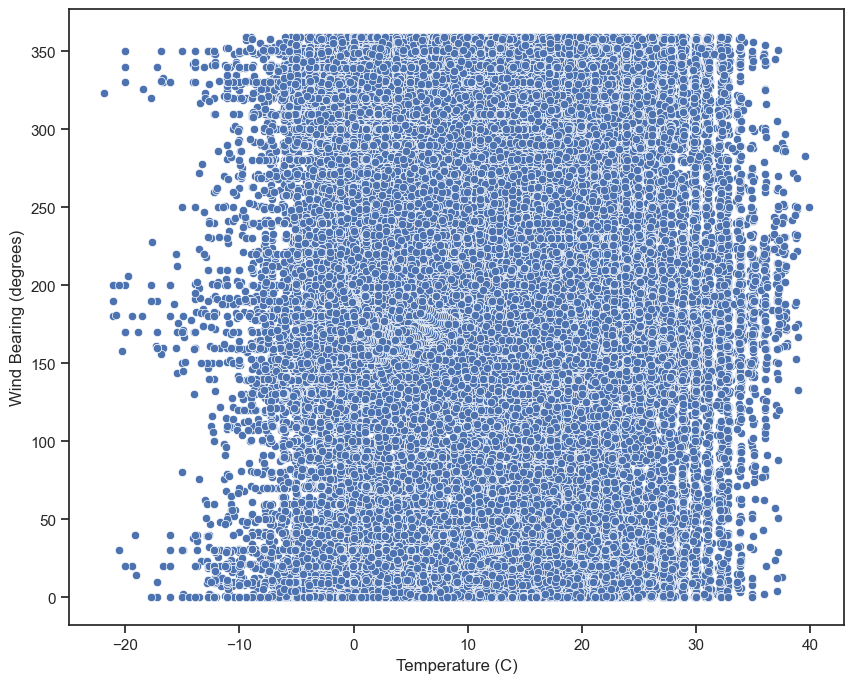

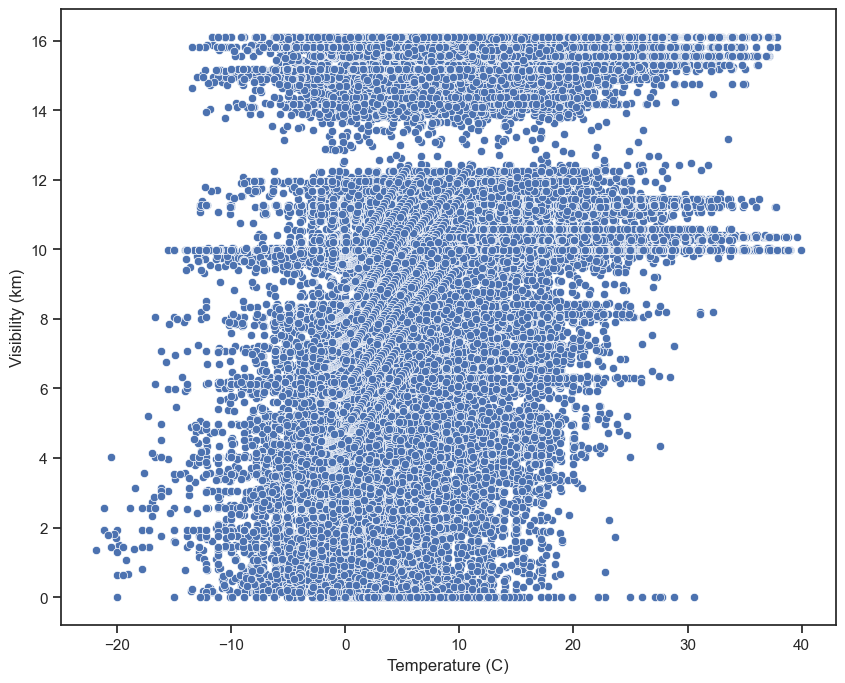

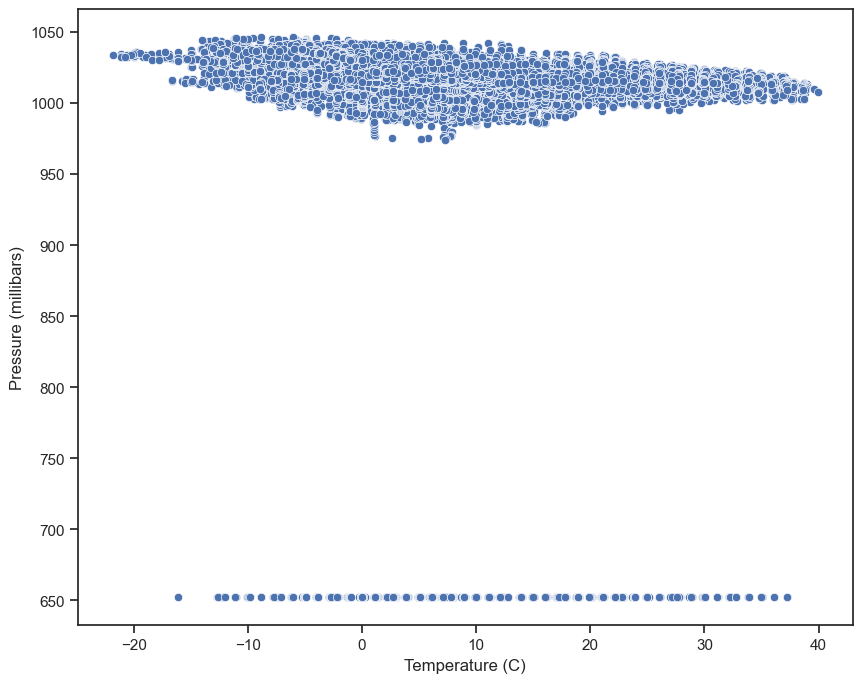

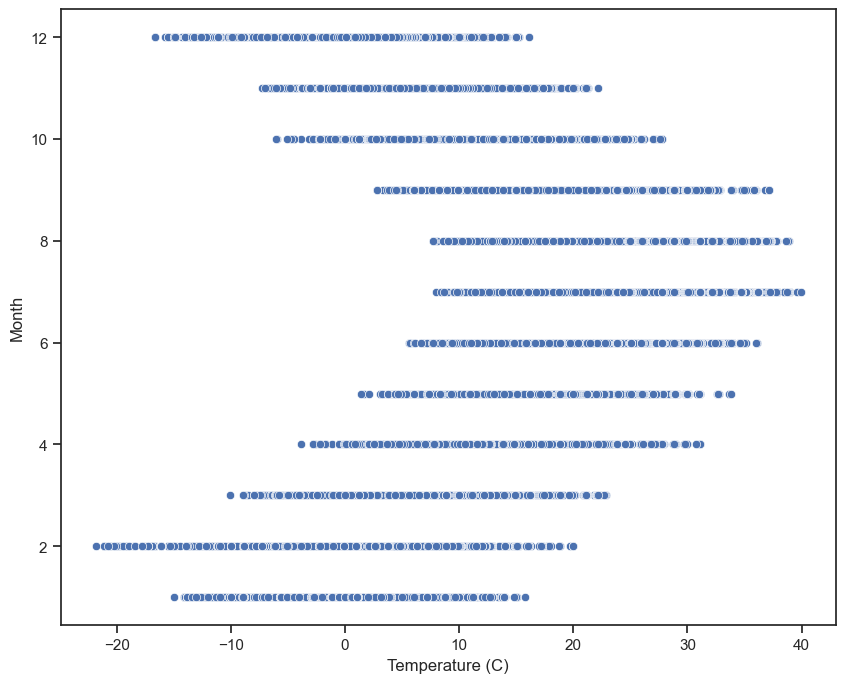

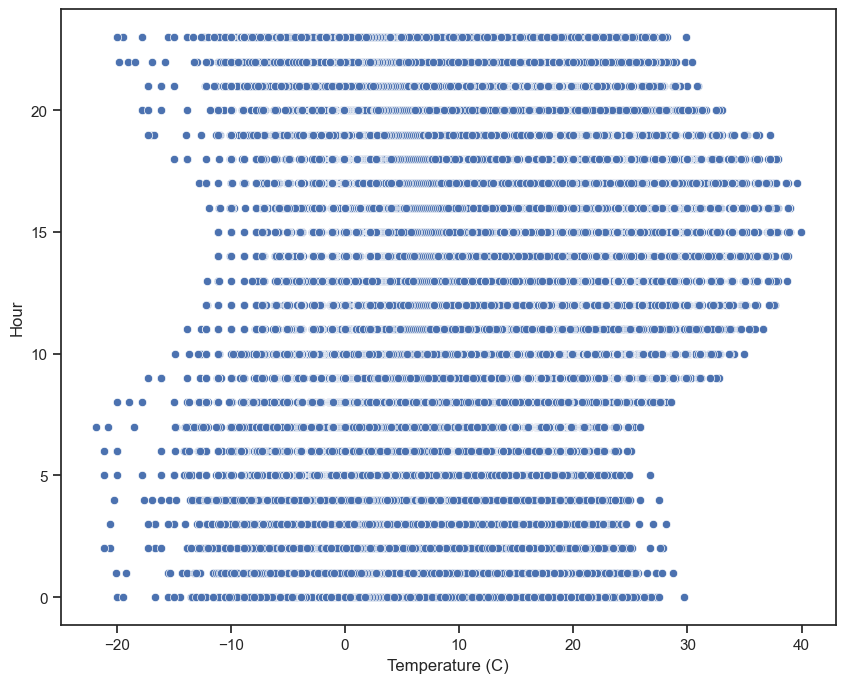

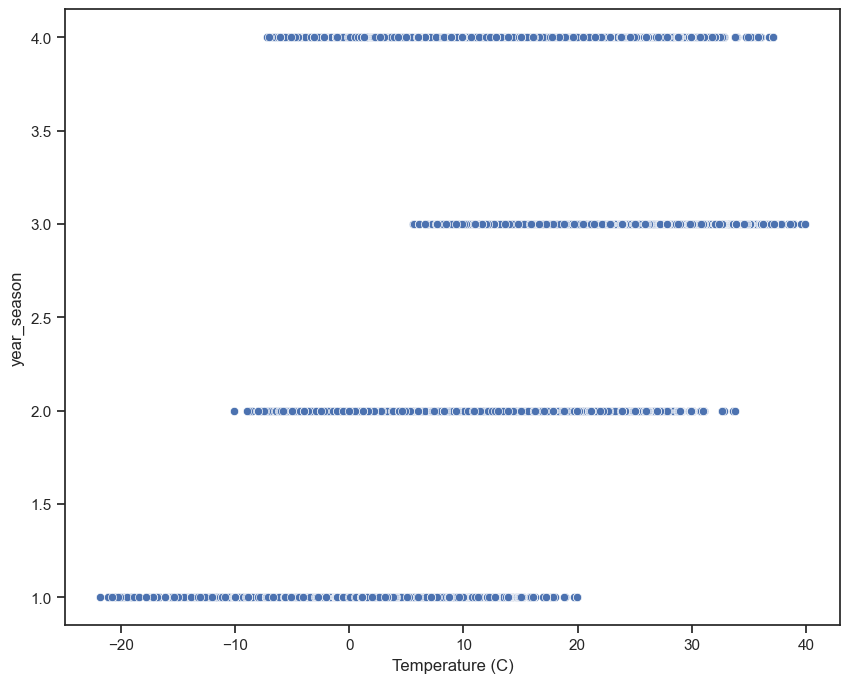

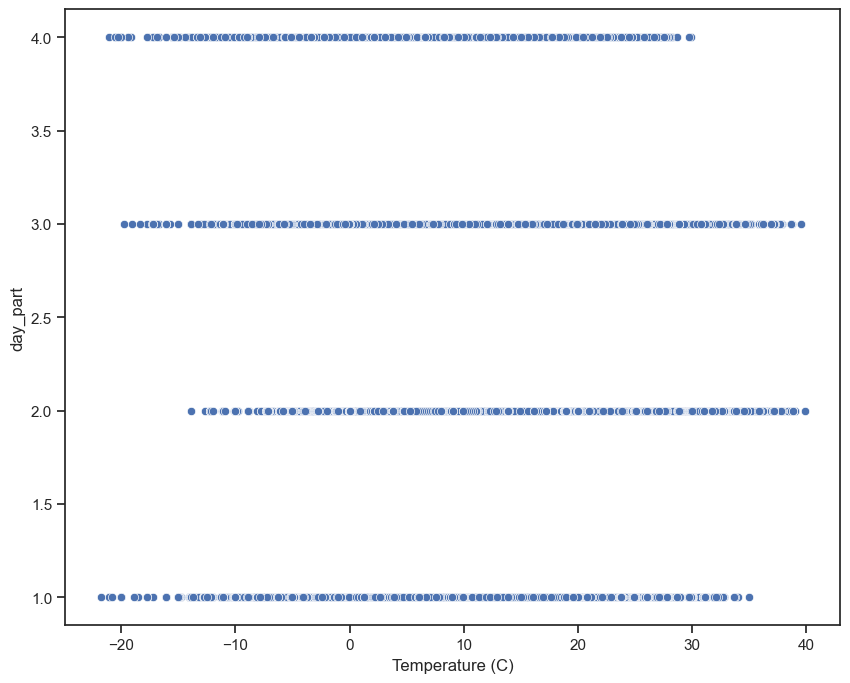

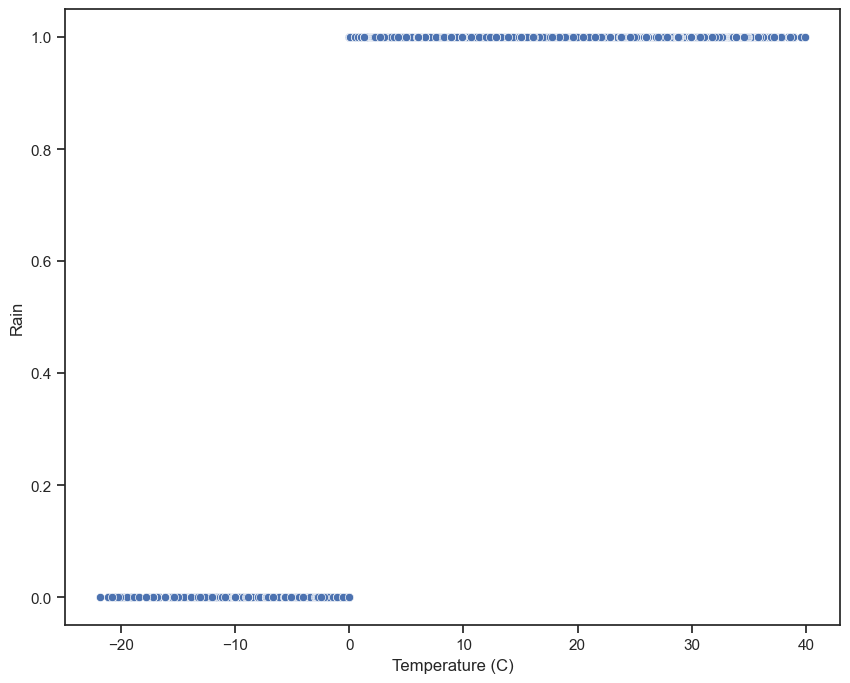

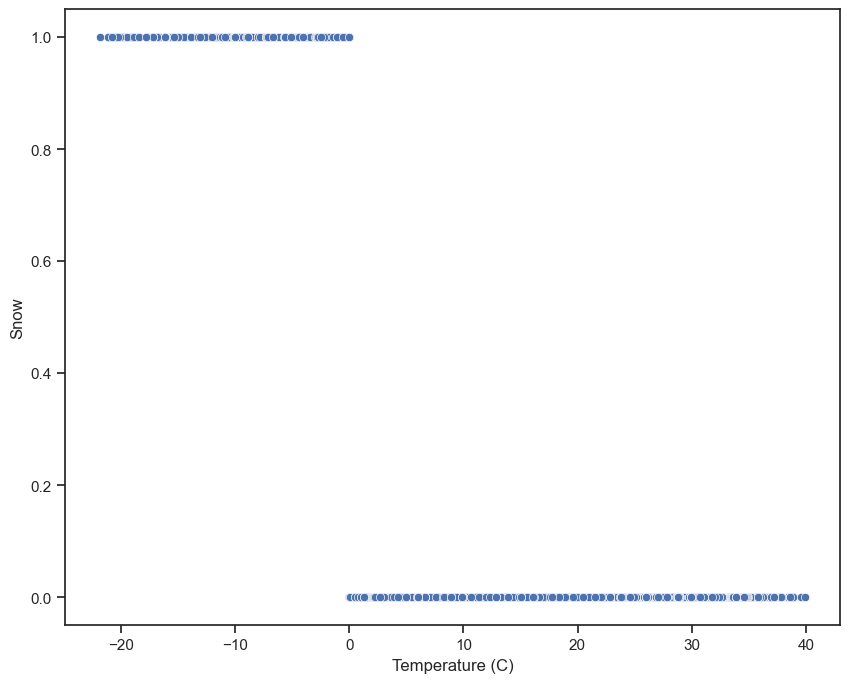

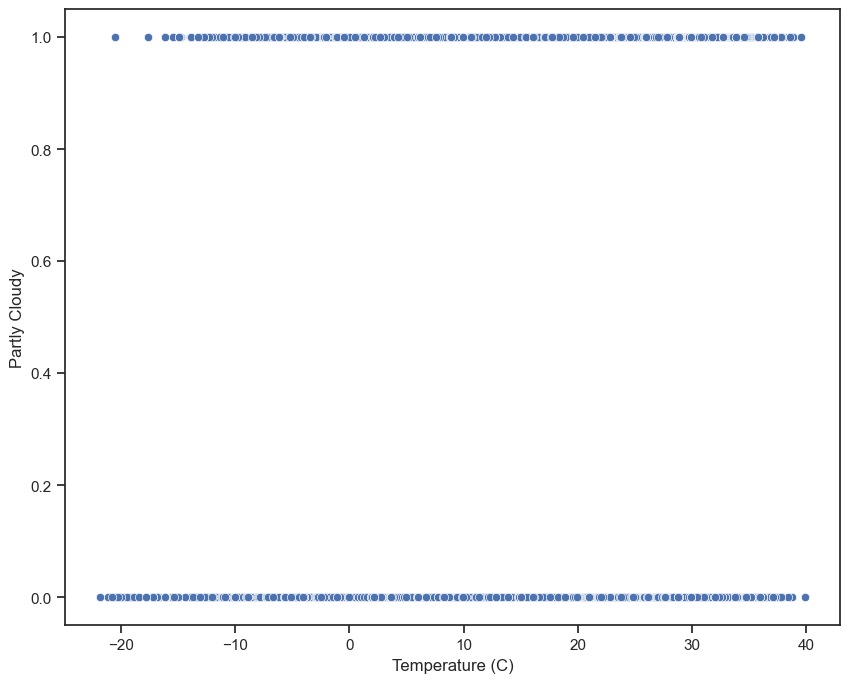

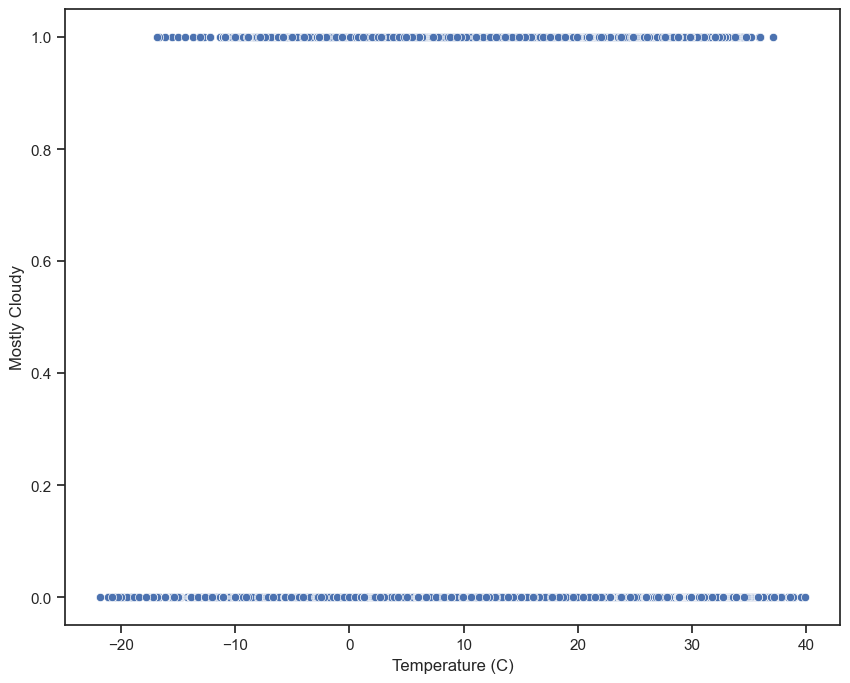

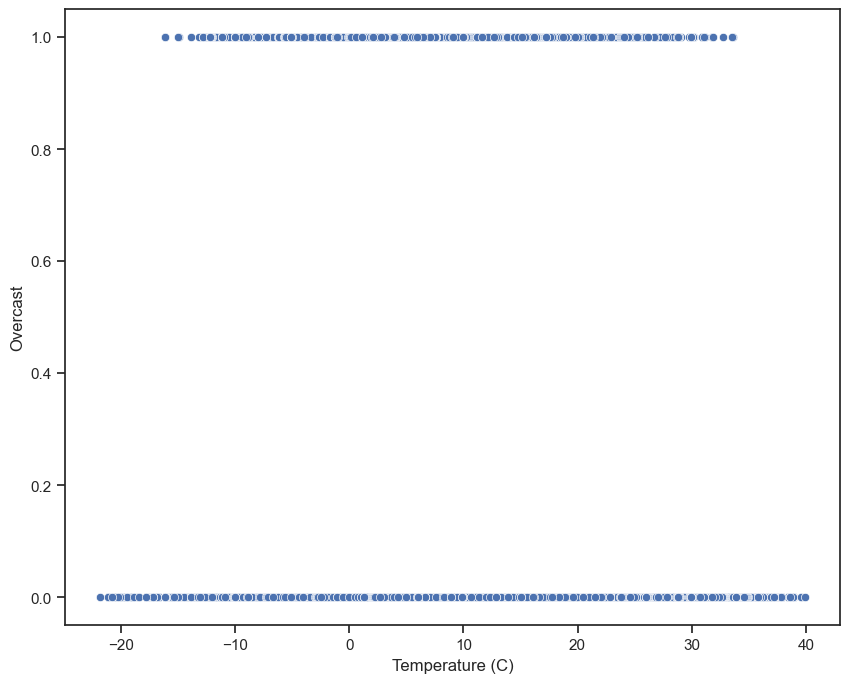

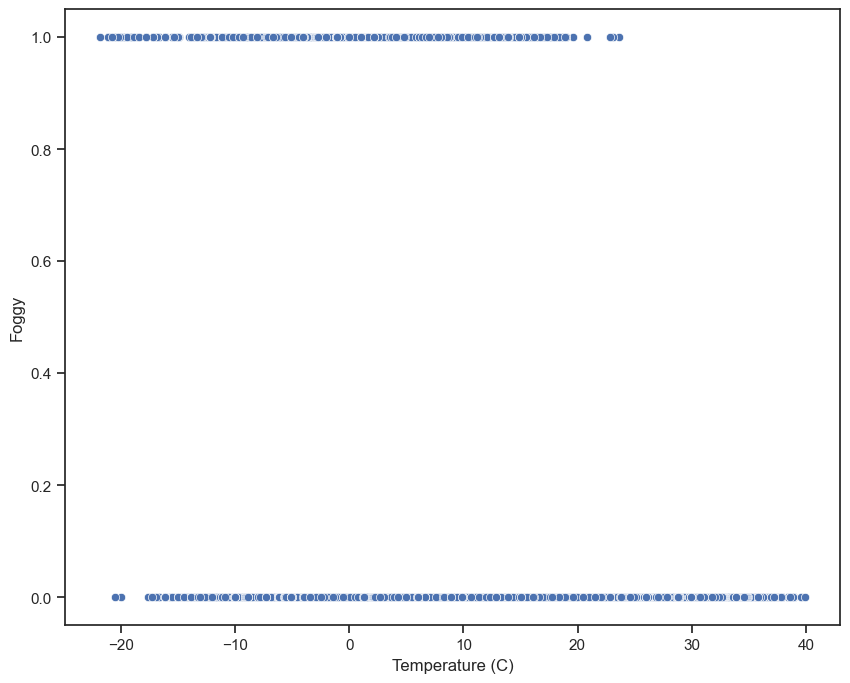

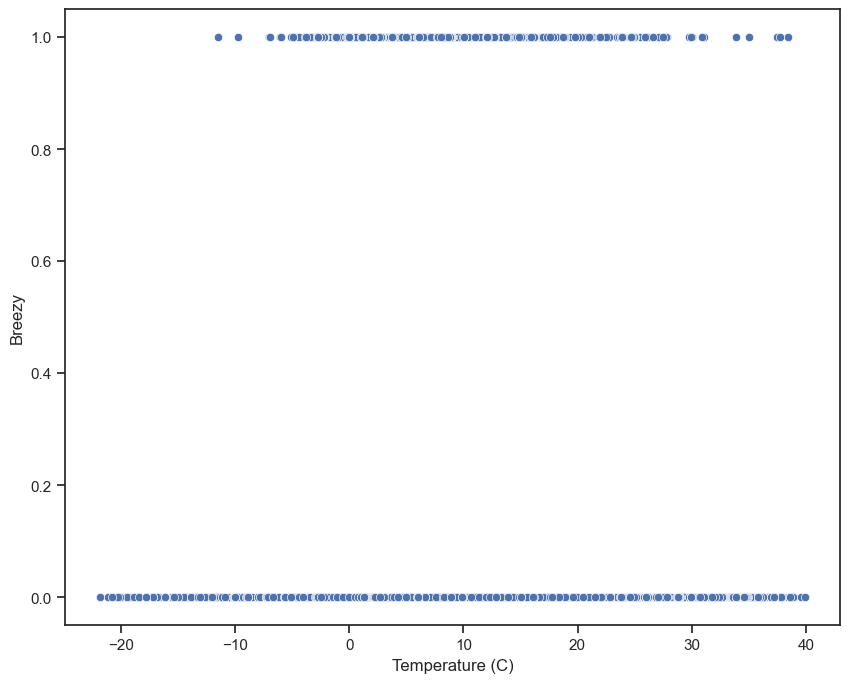

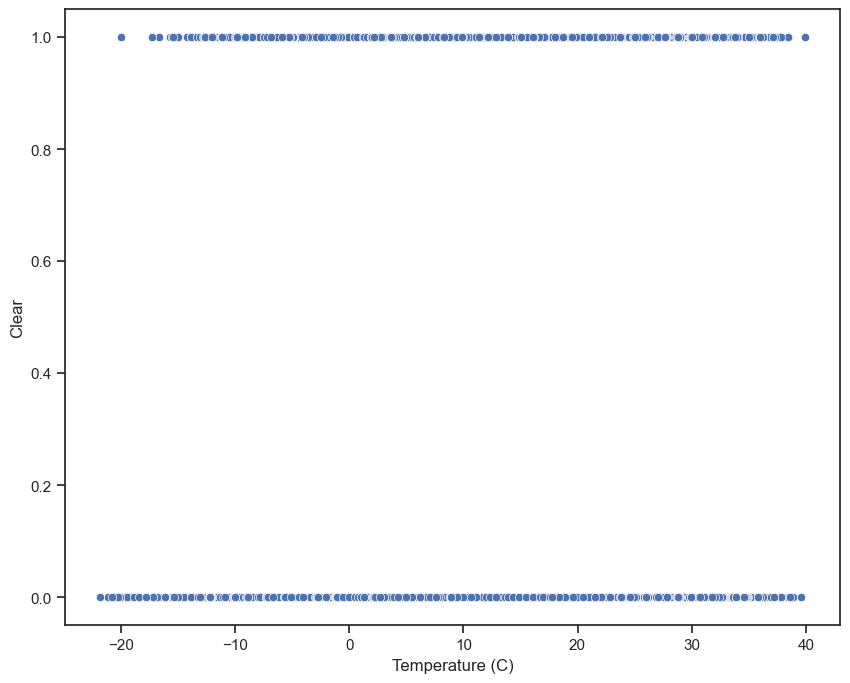

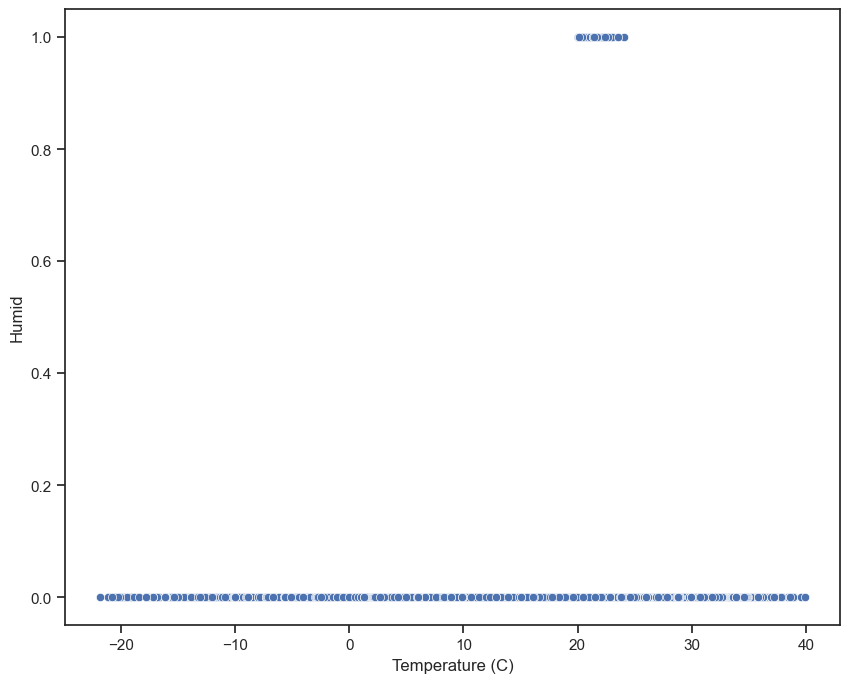

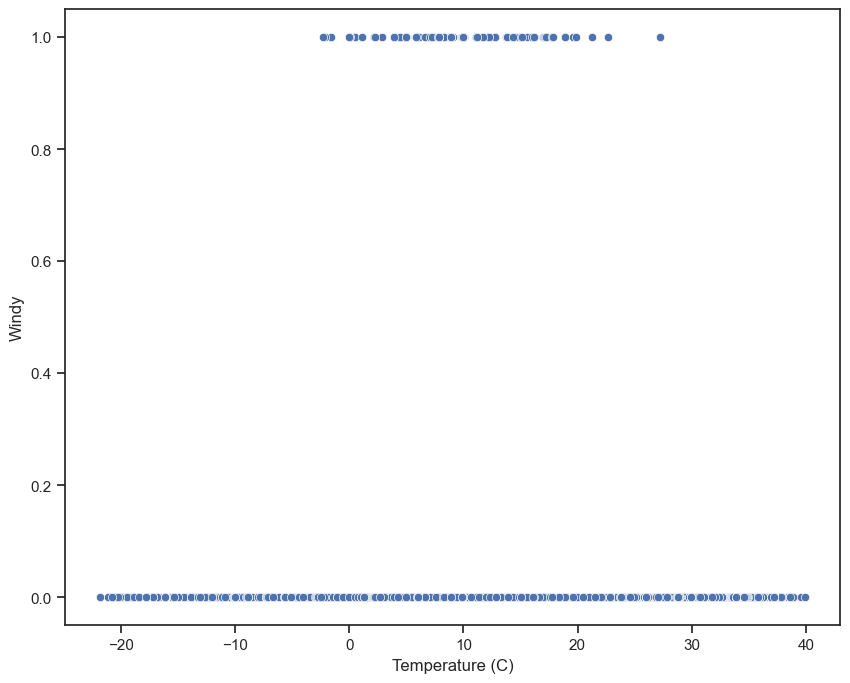

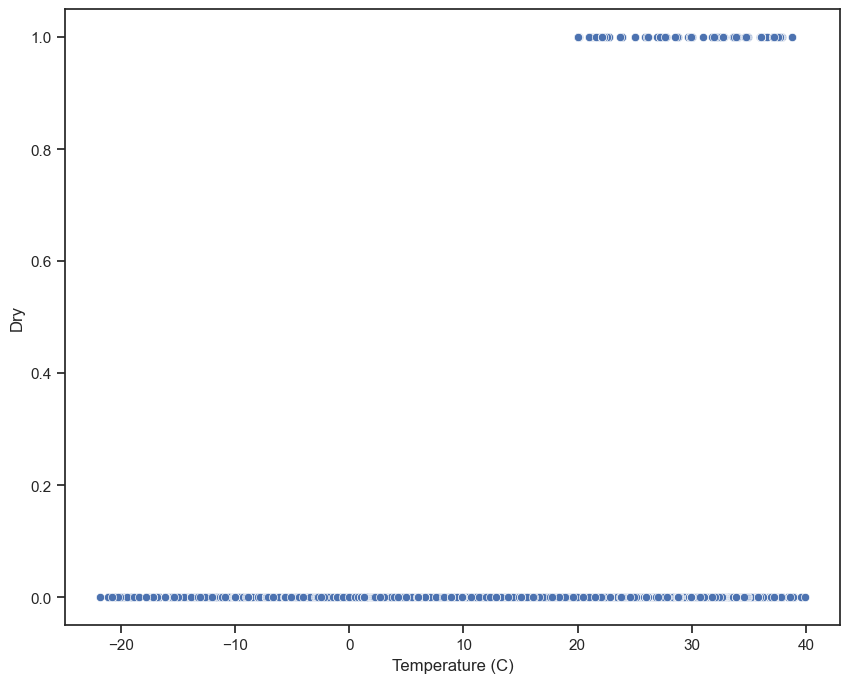

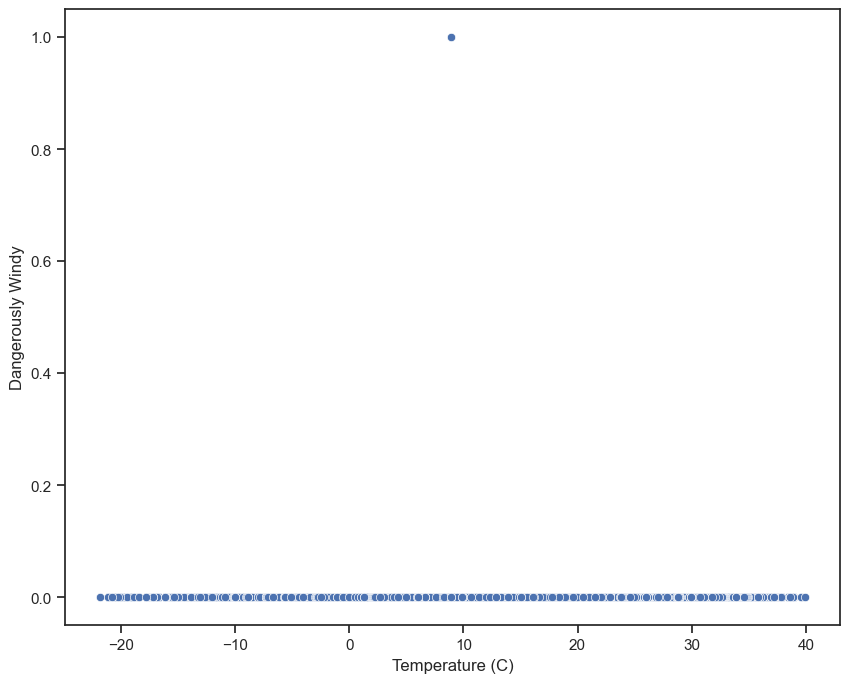

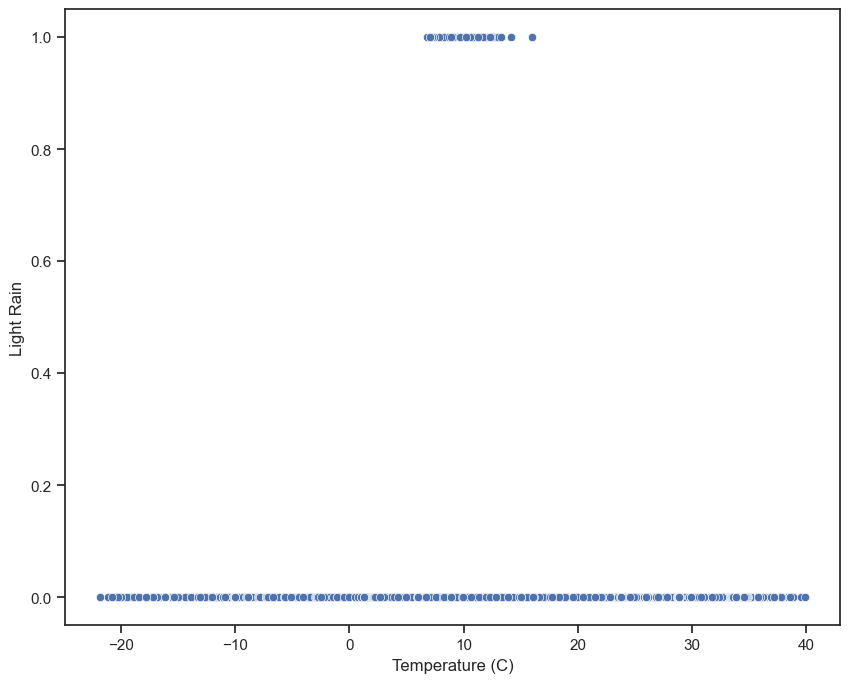

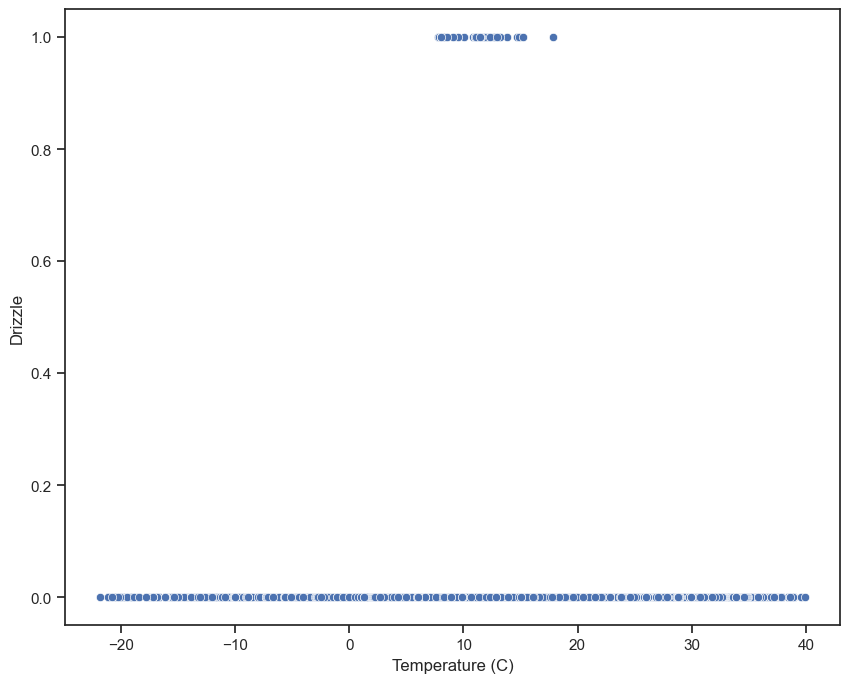

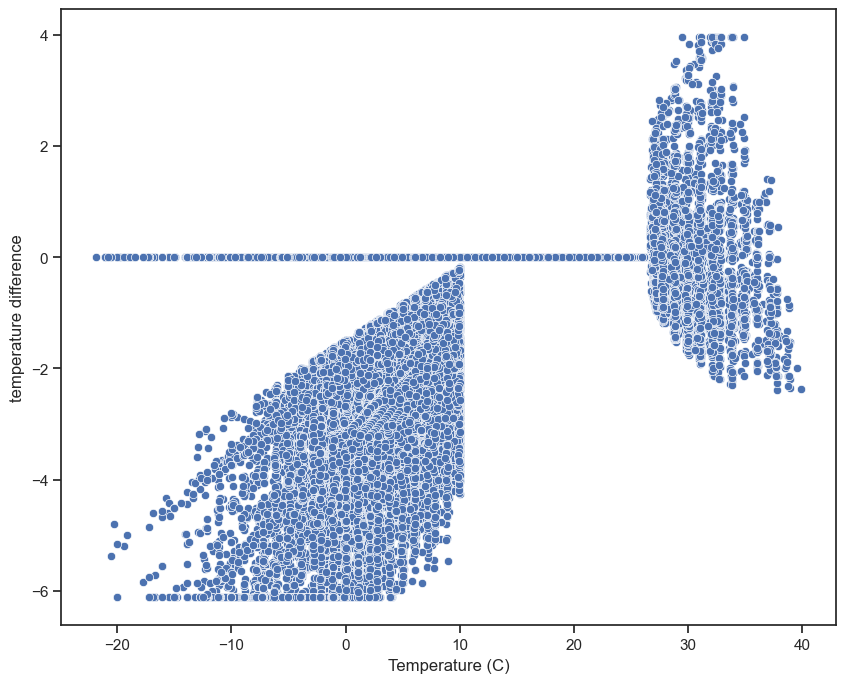

In [29]:
for col in df.drop(columns = ["Temperature (C)"]):
    sns.scatterplot(data=df, x="Temperature (C)", y= col)
    plt.show()

In [30]:
np.abs(df.corr()).loc[:,["Temperature (C)"]].sort_values(by = "Temperature (C)", ascending = False)

Temperature (C)
Temperature (C)                1.000000
temperature difference         0.636758
Humidity                       0.633089
Snow                           0.562620
Rain                           0.562620
year_season                    0.474858
Visibility (km)                0.392847
Foggy                          0.311106
Partly Cloudy                  0.302150
Overcast                       0.215298
Hour                           0.170134
Month                          0.149110
day_part                       0.075041
Dry                            0.060116
Mostly Cloudy                  0.046778
Pressure (millibars)           0.041276
Wind Bearing (degrees)         0.029988
Breezy                         0.029081
Humid                          0.024829
Wind Speed (km/h)              0.011357
Windy                          0.009096
Light Rain                     0.005115
Drizzle                        0.002285
Dangerously Windy              0.001007
Clear                          0.000283

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor

In [32]:
# separate the independent and dependent variables
chosen_features = ["Humidity", "Visibility (km)", "Partly Cloudy", "Mostly Cloudy", "year_season"]
X = df.loc[:, chosen_features]
y = df['Temperature (C)']

## Podział na zbiór testowy i treningowy

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((67517, 5), (28936, 5))

## Standaryzacja cech

In [34]:
def standardization(x):
    return (x - np.mean(x)) / np.std(x)

In [35]:
X_stand = X.apply(standardization)

In [36]:
X_stand.head()

Humidity  Visibility (km)  Partly Cloudy  Mostly Cloudy  year_season
0  0.793768         1.306976       1.409640      -0.650828    -0.451536
1  0.640201         1.306976       1.409640      -0.650828    -0.451536
2  0.793768         1.099586      -0.709401       1.536505    -0.451536
3  0.486635         1.306976       1.409640      -0.650828    -0.451536
4  0.486635         1.306976      -0.709401       1.536505    -0.451536

## Sprawdzenie liniowej zależności temperatury od wilgotności

<AxesSubplot: xlabel='Humidity', ylabel='Temperature (C)'>

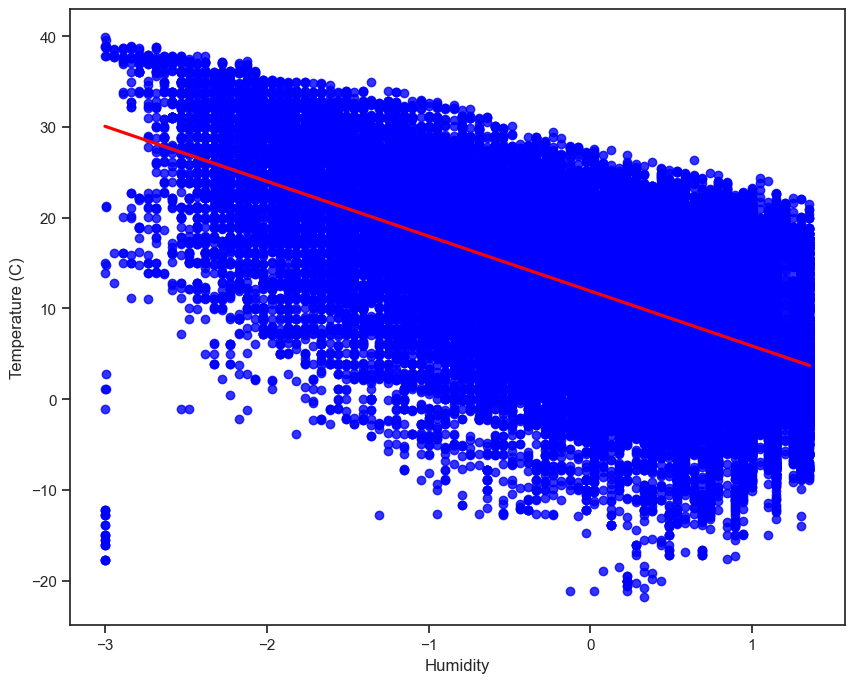

In [37]:
sns.regplot(x = X_stand['Humidity'], y = y, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

## Drzewo decyzyjne dla zmiennej Humidity

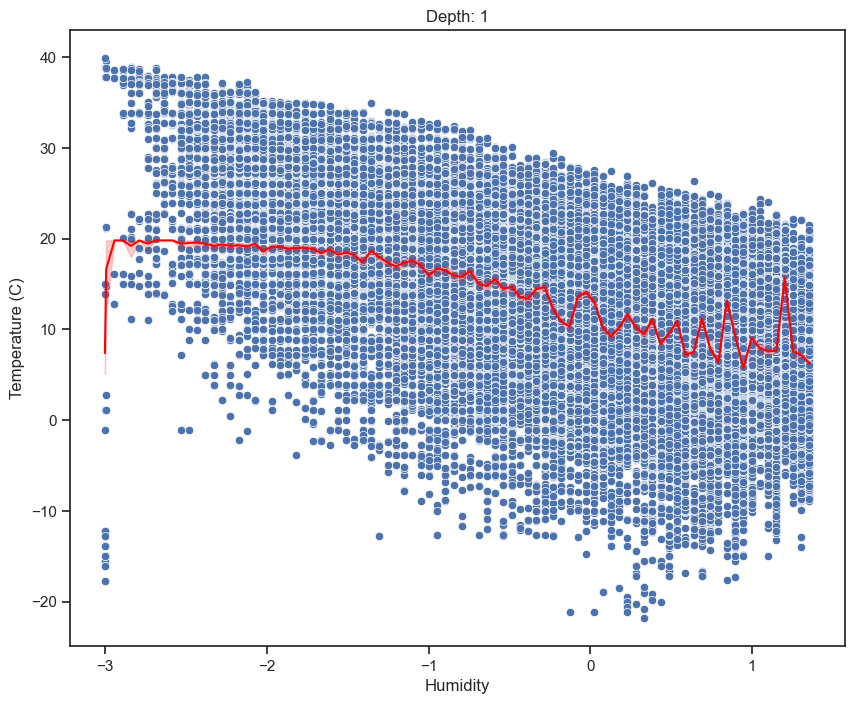

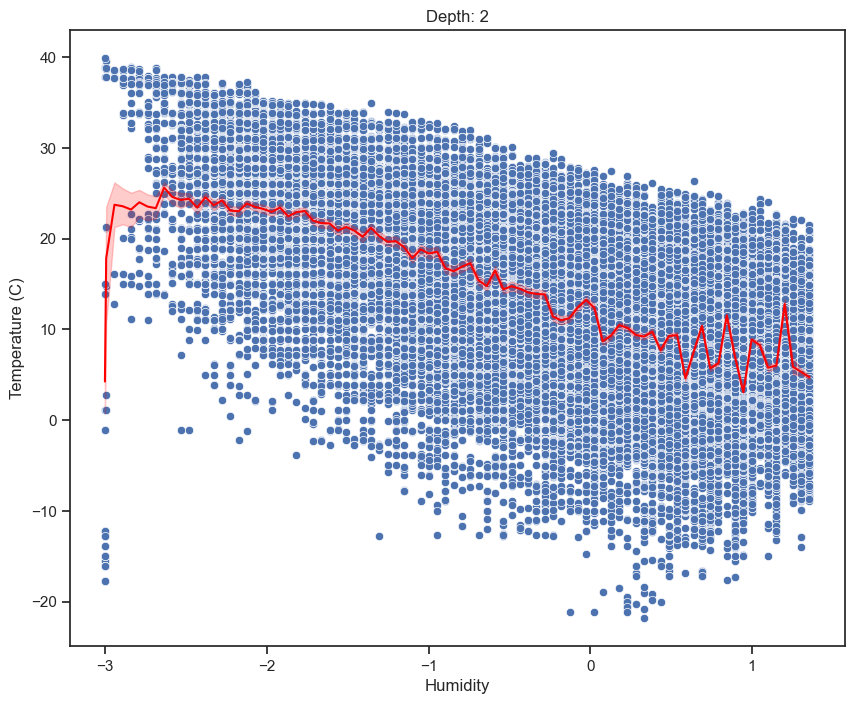

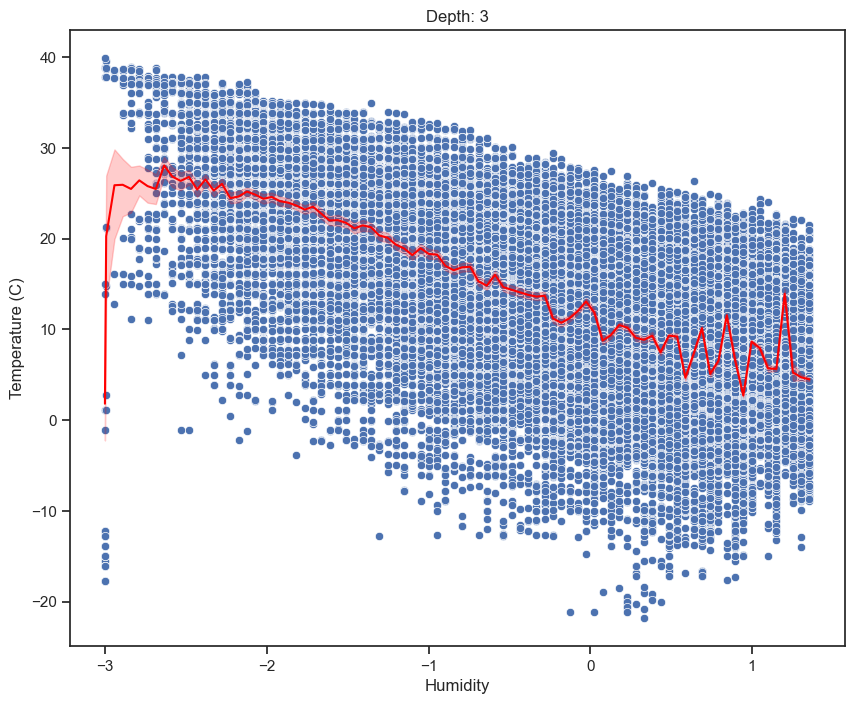

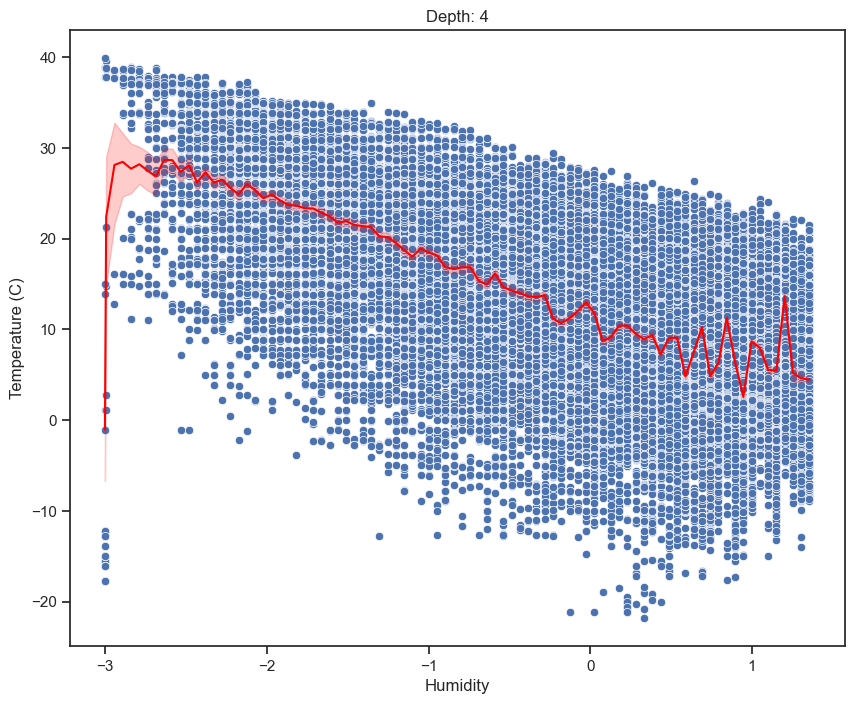

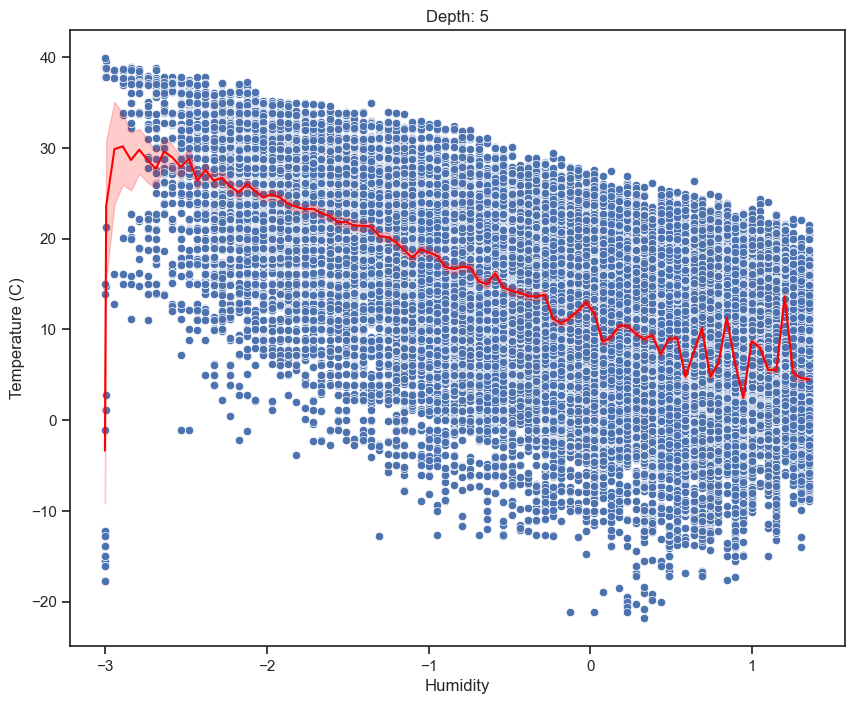

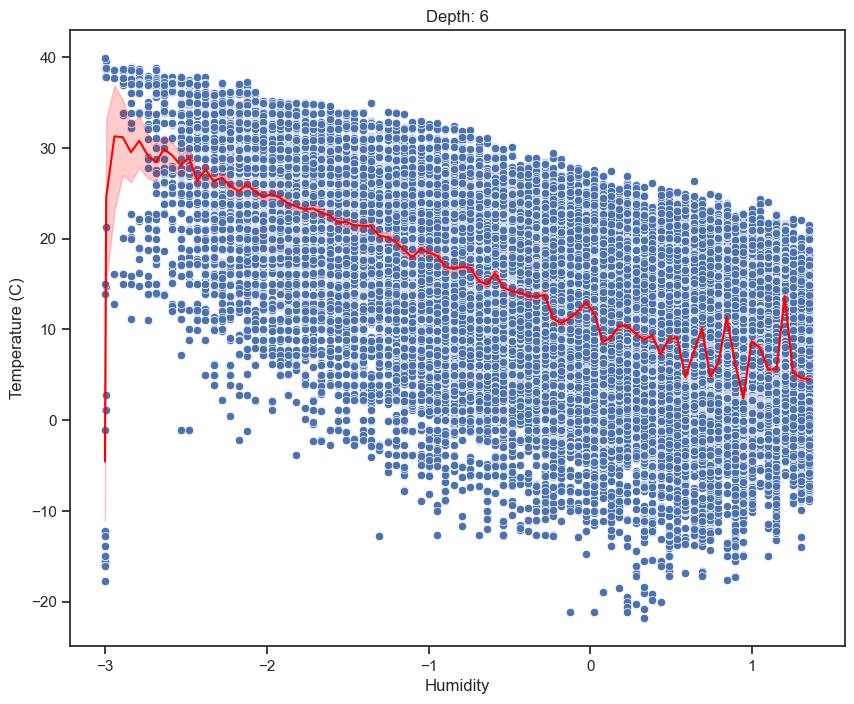

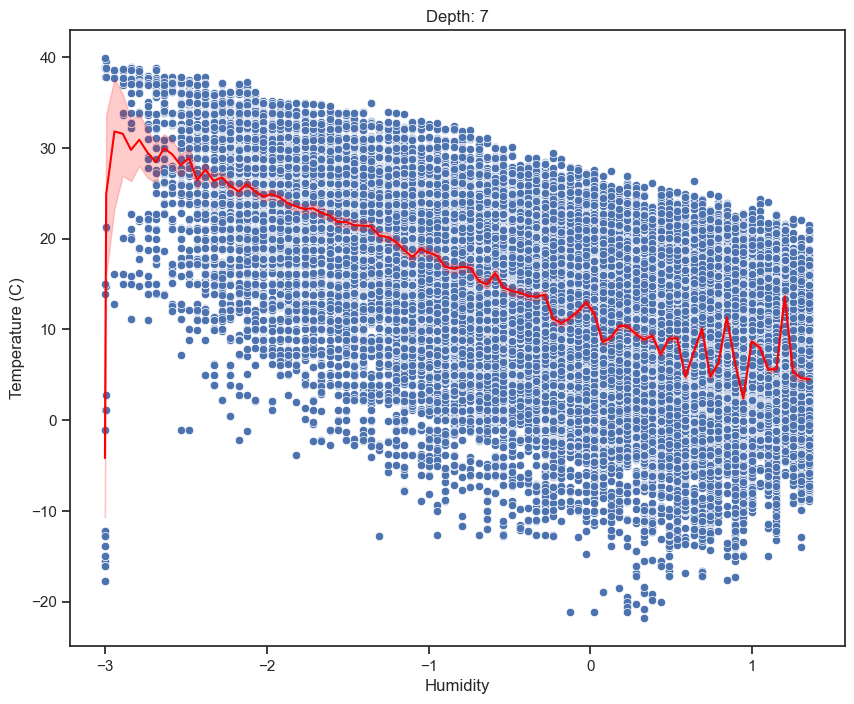

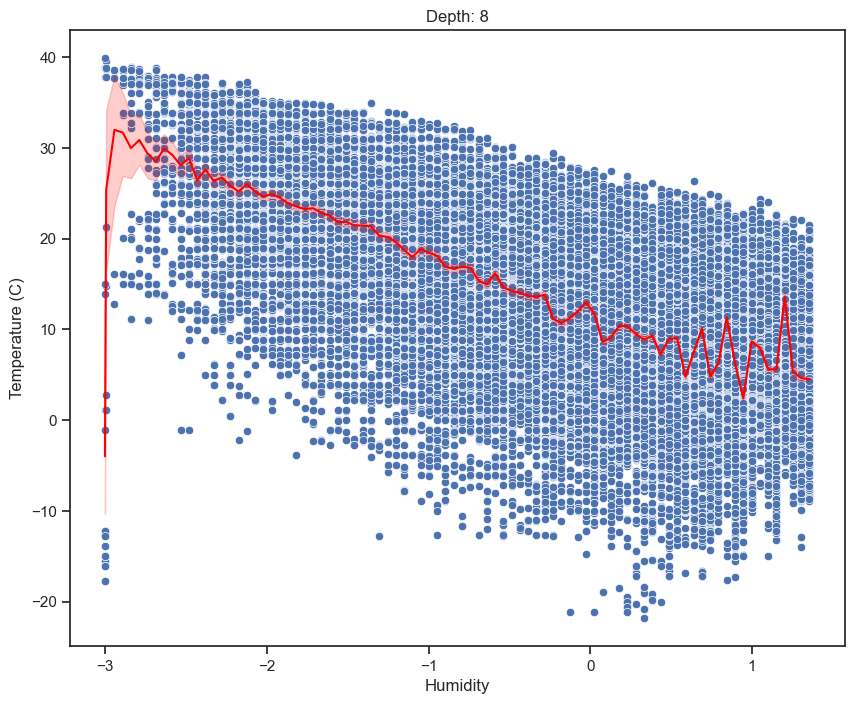

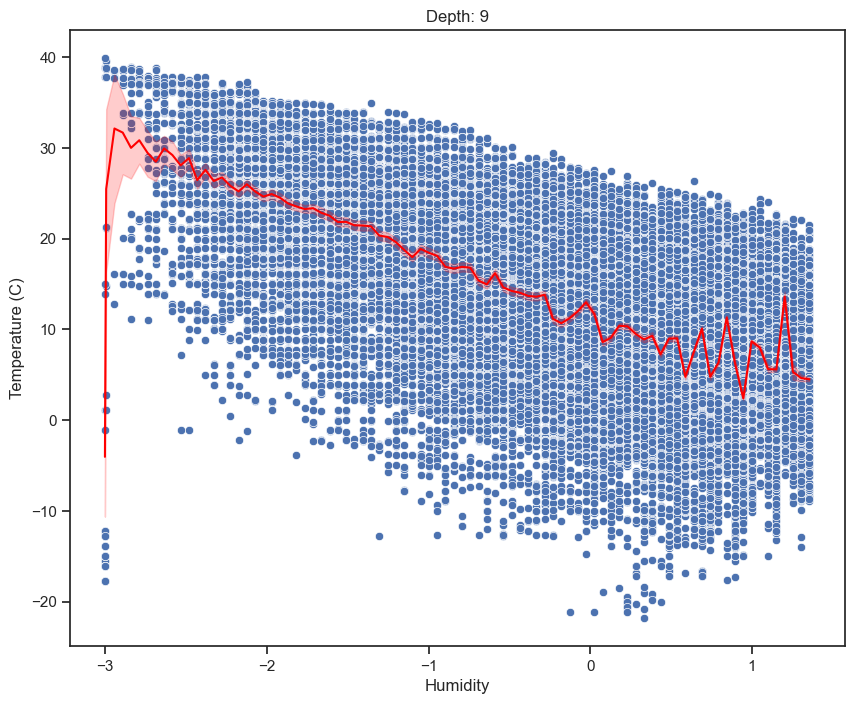

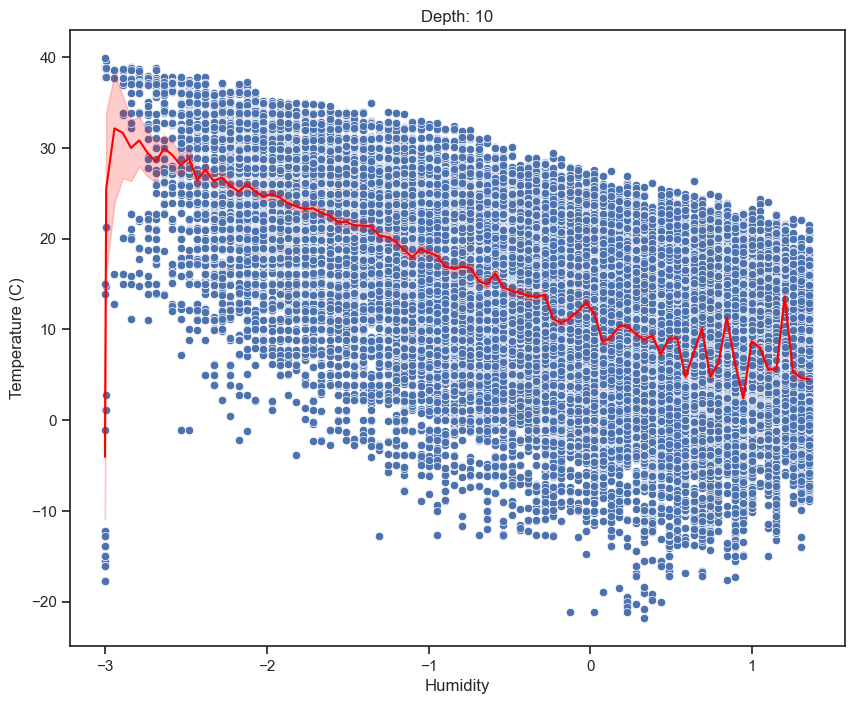

In [38]:
from sklearn.tree import DecisionTreeRegressor

for i in np.arange(1, 11):
    tree_model = DecisionTreeRegressor(max_depth = i)
    tree_model.fit(df, y)
    
    sns.scatterplot(x = X_stand['Humidity'], y = y)
    sns.lineplot(x = X_stand['Humidity'], y = tree_model.predict(df), color = "red")
    plt.title(f"Depth: {i}")
    plt.show()

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [40]:
lin_reg = LinearRegression()

In [41]:
poly = PolynomialFeatures(degree=5)
X_poly = poly.fit_transform(X_train)

In [42]:
X_poly[:5]

array([[1.00000e+00, 4.80000e-01, 9.98200e+00, ..., 0.00000e+00,
        0.00000e+00, 1.02400e+03],
       [1.00000e+00, 5.30000e-01, 1.12056e+01, ..., 2.70000e+01,
        8.10000e+01, 2.43000e+02],
       [1.00000e+00, 9.20000e-01, 1.89980e+00, ..., 0.00000e+00,
        0.00000e+00, 1.02400e+03],
       [1.00000e+00, 9.30000e-01, 9.70830e+00, ..., 0.00000e+00,
        0.00000e+00, 3.20000e+01],
       [1.00000e+00, 4.40000e-01, 9.98200e+00, ..., 0.00000e+00,
        0.00000e+00, 3.20000e+01]])

In [43]:
model = LinearRegression()
model.fit(X_poly, y_train)

LinearRegression()